### Visualizing the dataset

In [254]:
import pandas as pd
# Replace 'file.xlsx' with your file path
df = pd.read_excel("dataset.xlsx", sheet_name='Sheet1')

In [255]:
df_origin = df = pd.read_excel("dataset.xlsx", sheet_name='Sheet1')

the names of the columns are :

In [256]:
print(f"The columns of the dataset are : {df.columns}")

The columns of the dataset are : Index(['Date ', 'Service ', 'Type', 'lieu(point de prelevement) ',
       'nombre de germe ', 'Type de germe', 'Desinfecatant ', 'Volume/Ml',
       'Unnamed: 8'],
      dtype='object')


In [257]:
df.columns = df.columns.str.strip()


dropping column unnamed

In [258]:
df = df.drop("Unnamed: 8", axis=1)

To fill null values in a column with the last non-null value above them (forward fill) until another non-null value is encountered, you can use the pandas library in a Jupyter Notebook. This is commonly done with the fillna(method='ffill') method.

In [259]:
df['Date'] = df['Date'].fillna(method='ffill')
df["Service"] = df["Service"].fillna(method='ffill')
df["Type"] = df["Type"].fillna(method='ffill')
df["Desinfecatant"] = df["Desinfecatant"].fillna(method='ffill')
df["Volume/Ml"] = df["Volume/Ml"].fillna(method='ffill')

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\175743228.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')
C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\175743228.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Service"] = df["Service"].fillna(method='ffill')
C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\175743228.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Type"] = df["Type"].fillna(method='ffill')
C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\175743228.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Desinfecatant"] = df["Desinfecatant"].fillna(

Here we will fill the corresponding "lieu" column with "lavabos or air " as this value is NaN when the type is "lavabos or air "

In [260]:
df["lieu(point de prelevement)"] = df["lieu(point de prelevement)"].fillna(df["Type"])

### Formatting Date Column

#### Identifying Incorrect dates

In [261]:
print(df['Date'].head(10))  # Adjust column name as needed

0            02/01/20218
1            02/01/20218
2            02/01/20218
3            02/01/20218
4            02/01/20218
5            03/01/20218
6            03/01/20218
7            03/01/20218
8            03/01/20218
9    2018-01-27 00:00:00
Name: Date, dtype: object


Number of missing dates is :

In [262]:
print(df['Date'].isna().sum())

0


In [263]:
df['Date_formatted'] = pd.to_datetime(df['Date'],errors='coerce')

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\2520821314.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_formatted'] = pd.to_datetime(df['Date'],errors='coerce')


Number of the wrong dates

In [264]:
print(df['Date_formatted'].isna().sum())

20


The invalid dates are : 

In [265]:
df[df['Date_formatted'].isna()] ["Date"]

0       02/01/20218
1       02/01/20218
2       02/01/20218
3       02/01/20218
4       02/01/20218
5       03/01/20218
6       03/01/20218
7       03/01/20218
8       03/01/20218
13      29/01/20218
14      29/01/20218
15      29/01/20218
16      29/01/20218
17      29/01/20218
18      29/01/20218
42      29/03/20218
864       23/05/023
865       23/05/023
866       23/05/023
1360    19/100/2024
Name: Date, dtype: object

### <span style="color:orange; font-weight:bold; font-size:25px;">Fixing Invalid Dates in a DataFrame</span>

<span style="color:#2ecc71; font-weight:bold; font-size:20px;">df.loc</span>



To update values in a DataFrame based on a condition, use the following pattern:

```python
df.loc[rows_selected_through_condition, 'column_name'] = value
```
example :  

```python
 print(df.loc[df['Value'] > 15, 'Date ']) 
```

<span style="color:#2ecc71; font-weight:bold; font-size:20px;">df.iloc</span>  

we use it to access direcly a dataframe cell by row and column as if it is a matrix  

```python
    print(df[0,1]) or print (df[0:6, 4]) 
```

In [266]:
df.loc[df["Date"].str.contains("/20218", na=False), "Date"] = df["Date"].str.replace("/20218", "/2018", regex=False)
df.loc[df["Date"].str.contains("29/01", na=False), "Date"] = df["Date"].str.replace("29/01", "01/29", regex=False) # assigns to the matching indices of the LHS
df.loc[df["Date"].str.contains("29/03", na=False), "Date"] = df["Date"].str.replace("29/03", "03/29", regex=False)
df.loc[df["Date"].str.contains("23/05/023", na=False), "Date"] = df["Date"].str.replace("23/05/023", "05/23/2023", regex=False)
df.loc[df["Date"].str.contains("19/100/2024", na=False), "Date"] = df["Date"].str.replace("19/100/2024", "10/19/2024", regex=False)

In [267]:
df.head(20)

,Date,Service,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,Date_formatted
0,02/01/2018,pédiatrie chambre lyma,surface,element,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034",NaT
1,02/01/2018,pédiatrie chambre Trabolsi,surface,lit,4,Bacillus,Javel/nosocomial spray,"1,04/0,034",NaT
2,02/01/2018,pédiatrie chambre Trabolsi,surface,oreiller,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",NaT
3,02/01/2018,pédiatrie chambre Trabolsi,surface,table de nuit,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",NaT
4,02/01/2018,pédiatrie chambre Trabolsi,lavabos,lavabos,1,Bacillus,Javel/DDN suf,"1,04/0,17",NaT
5,03/01/2018,pédiatrie chambre Tunis,surface,lit,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034",NaT
6,03/01/2018,pédiatrie chambre Tunis,surface,table de nuit,3/20 /2,champignons/bactérie non pathogéne/Bacillus,Javel/nosocomial spray,"1,04/0,034",NaT
7,03/01/2018,pédiatrie chambre Tunis,surface,matelas,4/5,champignons/champignons,Javel/nosocomial spray,"1,04/0,034",NaT
8,03/01/2018,pédiatrie chambre Tunis,lavabos,lavabos,2,champignons,Javel/DDN suf,"1,04/0,17",NaT
9,2018-01-27 00:00:00,adulte chambre 11,surface,matelas,1,bactérie non pathogéne,Javel/nosocomial spray,"0,79/0,026",2018-01-27


In [268]:
df['Date_formatted'] = pd.to_datetime(df['Date'],errors='coerce')

In [269]:
print(f"the number of invalid dates is {df[df['Date_formatted'].isna()].shape[0]}")

the number of invalid dates is 0


In [270]:
df['Date'] = df['Date_formatted']

In [271]:
df.drop('Date_formatted', axis=1, inplace=True)


In [272]:
df.head(20)

,Date,Service,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml
0,2018-02-01,pédiatrie chambre lyma,surface,element,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034"
1,2018-02-01,pédiatrie chambre Trabolsi,surface,lit,4,Bacillus,Javel/nosocomial spray,"1,04/0,034"
2,2018-02-01,pédiatrie chambre Trabolsi,surface,oreiller,1,Bacillus,Javel/nosocomial spray,"1,04/0,034"
3,2018-02-01,pédiatrie chambre Trabolsi,surface,table de nuit,1,Bacillus,Javel/nosocomial spray,"1,04/0,034"
4,2018-02-01,pédiatrie chambre Trabolsi,lavabos,lavabos,1,Bacillus,Javel/DDN suf,"1,04/0,17"
5,2018-03-01,pédiatrie chambre Tunis,surface,lit,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034"
6,2018-03-01,pédiatrie chambre Tunis,surface,table de nuit,3/20 /2,champignons/bactérie non pathogéne/Bacillus,Javel/nosocomial spray,"1,04/0,034"
7,2018-03-01,pédiatrie chambre Tunis,surface,matelas,4/5,champignons/champignons,Javel/nosocomial spray,"1,04/0,034"
8,2018-03-01,pédiatrie chambre Tunis,lavabos,lavabos,2,champignons,Javel/DDN suf,"1,04/0,17"
9,2018-01-27,adulte chambre 11,surface,matelas,1,bactérie non pathogéne,Javel/nosocomial spray,"0,79/0,026"


<span style="color:orange; font-weight:bold; font-size:25px;">Handling "Service" column</span>

* This one ```python df["Service "].str.split(" ", n=1, expand=True ) ```returns a two dataframe columns: a column containing all the elements before the " " and another composed of what comes afterwards ( on the first occurence of " ")  
* Here we did split the Service into "category" and "chambre" columns

In [273]:
df[["category","chambre"]]= df["Service"].str.split(" ", n=1, expand=True )

df[df["category"] not in {"adulte", "pédiatrie"}].sum()

In [274]:
df[~df["category"].isin(["adulte", "pédiatrie"])]

,Date,Service,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre
20,2018-02-08,UGA,air,air,0,NaN,Nocolis,750,UGA,
32,2018-02-23,pediatrie chambre Dakkar,surface,table de nuit,2,bacillus,Javel/nosocomial spray,"0,94/0,031",pediatrie,chambre Dakkar
928,2023-07-18,UP chambre TUNIS,surface,lit,3,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
929,2023-07-18,UP chambre TUNIS,surface,Matelas,8,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
930,2023-07-18,UP chambre TUNIS,surface,oreiller,12,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
931,2023-07-18,UP chambre TUNIS,surface,Déssus éclérage,22/1,bactérie pathogéneN/Champignon,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
932,2023-07-18,UP chambre TUNIS,surface,table de nuit,1,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
933,2023-07-18,UP chambre TUNIS,surface,Table de lit,12,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
934,2023-07-18,UP chambre TUNIS,surface,Potence,10/1,bactérie pathogéneN/Champignon,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS
935,2023-07-18,UP chambre TUNIS,surface,chaise,5,bactérie non pathogéne,javel/Nosocomia surf spae,"0,76/0,197",UP,chambre TUNIS


In [275]:
df.iloc[32,9] = "pédiatrie"

In [276]:
df.loc[df['category'].str.contains('UP'), 'category'] = "pédiatrie"

In [277]:
df[~df["category"].isin(["adulte", "pédiatrie"])]

,Date,Service,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre
20,2018-02-08,UGA,air,air,0,NaN,Nocolis,750,UGA,
32,2018-02-23,pediatrie chambre Dakkar,surface,table de nuit,2,bacillus,Javel/nosocomial spray,"0,94/0,031",pediatrie,pédiatrie


In [278]:
df= df[df["category"].isin(["adulte", "pédiatrie"])]

### Binary encoding of the Category column : 

In [279]:
df["category"].unique()

array(['pédiatrie', 'adulte'], dtype=object)

category : 1= pédiatrie ; 0= adulte

In [280]:
df["category"] = df["category"].apply(lambda x: int (x == "pédiatrie"))

In [281]:
df = df.drop('Service', axis=1)


In [282]:
df.head(10)

,Date,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre
0,2018-02-01,surface,element,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034",1,chambre lyma
1,2018-02-01,surface,lit,4,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambre Trabolsi
2,2018-02-01,surface,oreiller,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambre Trabolsi
3,2018-02-01,surface,table de nuit,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambre Trabolsi
4,2018-02-01,lavabos,lavabos,1,Bacillus,Javel/DDN suf,"1,04/0,17",1,chambre Trabolsi
5,2018-03-01,surface,lit,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034",1,chambre Tunis
6,2018-03-01,surface,table de nuit,3/20 /2,champignons/bactérie non pathogéne/Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambre Tunis
7,2018-03-01,surface,matelas,4/5,champignons/champignons,Javel/nosocomial spray,"1,04/0,034",1,chambre Tunis
8,2018-03-01,lavabos,lavabos,2,champignons,Javel/DDN suf,"1,04/0,17",1,chambre Tunis
9,2018-01-27,surface,matelas,1,bactérie non pathogéne,Javel/nosocomial spray,"0,79/0,026",0,chambre 11


### <span style="color:orange; font-weight:bold; font-size:25px">Handling "chambre" column</span>

In [283]:
print(f"number of distinct chambers is {df['chambre'].nunique()}")

number of distinct chambers is 125


In [284]:
df["chambre"].unique()

array(['  chambre lyma', '  chambre Trabolsi', '  chambre Tunis',
       'chambre 11', 'chambre 5', ' cabine 5', 'chambre 10 ', 'chambre 3',
       'chambre 1', 'chambre 9', 'cabine 10', ' chambre lyma', 'cabine 8',
       ' cabine 9', ' chambre Nyami', 'cabine 11', 'Cabine 2', 'cabine 7',
       ' cabine 3', ' cabine 2', ' chambe lyma', ' cabine 6',
       ' chambre Niami', ' chambre Konacri', ' chambre Lyma',
       ' chambre cotono', ' chambre Abijan', 'chambre 2', 'cabine 9',
       'cabine 5', ' chambre Abidjan', 'Cabine6', ' chambre Mousko',
       ' chambre TUNIS', ' cabine 4', 'cabine 1', 'chambre 8', 'cabine 3',
       ' chambre Kods', 'chambre 12', ' chambre 1', 'cabine 6',
       ' cabine 7', ' cabine 1', ' chambre  London', 'chambre 12 ',
       ' Chambre mosco', ' chambre Trabelsi', ' chambre ABIDJEN',
       ' chambre LYMA', ' DAKHAR', ' PARIS', ' cabine3', ' Cabine 2',
       'Cabine 9', ' Trabols', ' Cabine 4', ' Cabine 1', ' chamre tunis',
       'Cabine 11', ' chambre

In [285]:
pd.set_option("display.max_rows", None)
df["chambre"].value_counts()

chambre
chambre 1               74
chambre 11              71
chambre 9               61
 cabine 4               55
chambre 8               51
chambre 2               49
chambre 3               47
 cabine 2               40
 cabine 5               39
 cabine 3               35
 cabine 1               34
chambre 10              29
cabine 5                28
cabine 6                28
chambre 4               27
cabine 10               21
cabine 11               20
 chambre LYMA           20
cabine 8                20
chambre 12              19
chambre 12              19
chambre KODS            18
cabine 7                17
 Cabine 1               17
 Cabine 4               16
cabine 9                16
chambre 5               15
 chambre LYMA           15
chambre TUNIS           14
 Cabine 2               13
chambre COTONO          13
Chambre 4               13
 chambre bagdad         12
chambre CONACRI         12
Cabine 11               10
 chambre Abidjen        10
 chambre 9          

In [286]:
column = df["chambre"].str.replace(" ", "")
column = column.apply(lambda x: x.lower())
column= column.sort_values()
column.value_counts().sort_index() 


chambre
cabiine2              2
cabine1              64
cabine10             22
cabine11             34
cabine12              7
cabine2              57
cabine3              56
cabine4              80
cabine5              74
cabine6              37
cabine7              22
cabine8              27
cabine9              28
cambretunis           3
chambelyma            1
chambre1             84
chambre10            42
chambre11            71
chambre12            38
chambre2             58
chambre2interieur     9
chambre3             55
chambre4             40
chambre5             15
chambre6              2
chambre8             58
chambre9             71
chambreabidjan        1
chambreabidjen       20
chambreabijan         4
chambrebagdad        12
chambreconacri       21
chambrecotono        22
chambrectono          9
chambredakar         12
chambrekhorthoume     3
chambrekods          41
chambrekonacri        2
chambrekonakrai       6
chambrekonakri        3
chambrelondon         7
chambrel

In [287]:
import pandas as pd
import re
from difflib import SequenceMatcher

def get_prefix(s):
    return re.sub(r'\d+', '', s)

def get_suffix(s):
    match = re.search(r'\d+$', s)
    return match.group() if match else ''

def char_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

def cluster_generator(column, threshold):
    column = list(column)
    clusters= {}
    cluster_id = 0
    for i in range(len(column)):
        alone = True
        if column[i] not in clusters:
            for j in range(i+1, len(column)):
                prefix_i = get_prefix(column[i])
                prefix_j = get_prefix(column[j])
                suffix_i = get_suffix(column[i])
                suffix_j= get_suffix(column[j])
                if (char_similarity(prefix_i, prefix_j) > threshold and suffix_i == suffix_j):
                    clusters[column[i]] = cluster_id
                    clusters[column[j]] = cluster_id                                       
                    alone = False
            if alone == True:
                clusters[column[i]] = -1
            else:
                cluster_id += 1 
    return clusters

In [288]:
clusters= cluster_generator(column, threshold=0.8)
clusters

{'cabiine2': 0,
 'cabine2': 0,
 'cabine1': 1,
 'cabine10': 2,
 'cabine11': 3,
 'cabine12': 4,
 'cabine3': 5,
 'cabine4': 6,
 'cabine5': 7,
 'cabine6': 8,
 'cabine7': 9,
 'cabine8': 10,
 'cabine9': 11,
 'cambretunis': 12,
 'chambretunis': 12,
 'chamretunis': 12,
 'chambelyma': 13,
 'chambrelyma': 13,
 'chambre1': 14,
 'chambre10': 15,
 'chambre11': 16,
 'chambre12': 17,
 'chambre2': 18,
 'chambre2interieur': 19,
 'chambre3': 20,
 'chambre4': 21,
 'chambre5': 22,
 'chambre6': 23,
 'chambre8': 24,
 'chambre9': 25,
 'chambreabidjan': 26,
 'chambreabidjen': 26,
 'chambreabijan': 26,
 'chambrebagdad': 27,
 'chambreconacri': 28,
 'chambrekonacri': 28,
 'chambrekonakrai': 28,
 'chambrekonakri': 28,
 'chambrecotono': 29,
 'chambrectono': 29,
 'chambredakar': 30,
 'chambrekhorthoume': 31,
 'chambrekods': 32,
 'chambrelondon': 33,
 'chambremosco': 34,
 'chambremoscou': 34,
 'chambremousko': 34,
 'chambreniami': 35,
 'chambrenyami': 35,
 'chambreparis': 36,
 'chambrepikine': 37,
 'chambretrabelsi'

In [289]:
mapping = {
    0:  'cabine2',
    1:  'cabine1',
    2:  'cabine10',
    3:  'cabine11',
    4:  'cabine12',
    5:  'cabine3',
    6:  'cabine4',
    7:  'cabine5',
    8:  'cabine6',
    9:  'cabine7',
    10: 'cabine8',
    11: 'cabine9',
    12: 'chambretunis',
    13: 'chambrelyma',
    14: 'chambre1',
    15: 'chambre10',
    16: 'chambre11',
    17: 'chambre12',
    18: 'chambre2',
    19: 'chambre2',            # chambre2interieur → chambre2
    20: 'chambre3',
    21: 'chambre4',
    22: 'chambre5',
    23: 'chambre6',
    24: 'chambre8',
    25: 'chambre9',
    26: 'chambreabidjan',      # chambreabidjan ← chambreabidjen, chambreabijan
    27: 'chambrebagdad',
    28: 'chambrekonakri',      # corrects conacri/konacri/konakrai → konakri
    29: 'chambrecotono',       # fixes cotono/ctono → cotono
    30: 'chambredakar',        # fixes dakkar → dakar
    31: 'chambrekhorthoume',
    32: 'chambrekods',
    33: 'chambrelondon',
    34: 'chambremoscou',       # standardize mosco/moscou/mousko → moscou
    35: 'chambreniami',        # niami/nyami → niami
    36: 'chambreparis',
    37: 'chambrepikine',
    38: 'chambretrabelsi',     # trabolsi/trabols → trabelsi
    39: 'chambrekonakri',            # lone cluster for “konakrai”
    40: 'chambrelondon',              # lone cluster for “london”
    41: 'chambretrabelsi',             # lone cluster for “trabols”
}


In [290]:
keyMap = {k: mapping[v] for k, v in clusters.items() if v in mapping}
keyMap


{'cabiine2': 'cabine2',
 'cabine2': 'cabine2',
 'cabine1': 'cabine1',
 'cabine10': 'cabine10',
 'cabine11': 'cabine11',
 'cabine12': 'cabine12',
 'cabine3': 'cabine3',
 'cabine4': 'cabine4',
 'cabine5': 'cabine5',
 'cabine6': 'cabine6',
 'cabine7': 'cabine7',
 'cabine8': 'cabine8',
 'cabine9': 'cabine9',
 'cambretunis': 'chambretunis',
 'chambretunis': 'chambretunis',
 'chamretunis': 'chambretunis',
 'chambelyma': 'chambrelyma',
 'chambrelyma': 'chambrelyma',
 'chambre1': 'chambre1',
 'chambre10': 'chambre10',
 'chambre11': 'chambre11',
 'chambre12': 'chambre12',
 'chambre2': 'chambre2',
 'chambre2interieur': 'chambre2',
 'chambre3': 'chambre3',
 'chambre4': 'chambre4',
 'chambre5': 'chambre5',
 'chambre6': 'chambre6',
 'chambre8': 'chambre8',
 'chambre9': 'chambre9',
 'chambreabidjan': 'chambreabidjan',
 'chambreabidjen': 'chambreabidjan',
 'chambreabijan': 'chambreabidjan',
 'chambrebagdad': 'chambrebagdad',
 'chambreconacri': 'chambrekonakri',
 'chambrekonacri': 'chambrekonakri',
 '

In [291]:

keyMap.update({'dakhar': 'chambredakar', 'paris': 'chambreparis'})
keyMap

{'cabiine2': 'cabine2',
 'cabine2': 'cabine2',
 'cabine1': 'cabine1',
 'cabine10': 'cabine10',
 'cabine11': 'cabine11',
 'cabine12': 'cabine12',
 'cabine3': 'cabine3',
 'cabine4': 'cabine4',
 'cabine5': 'cabine5',
 'cabine6': 'cabine6',
 'cabine7': 'cabine7',
 'cabine8': 'cabine8',
 'cabine9': 'cabine9',
 'cambretunis': 'chambretunis',
 'chambretunis': 'chambretunis',
 'chamretunis': 'chambretunis',
 'chambelyma': 'chambrelyma',
 'chambrelyma': 'chambrelyma',
 'chambre1': 'chambre1',
 'chambre10': 'chambre10',
 'chambre11': 'chambre11',
 'chambre12': 'chambre12',
 'chambre2': 'chambre2',
 'chambre2interieur': 'chambre2',
 'chambre3': 'chambre3',
 'chambre4': 'chambre4',
 'chambre5': 'chambre5',
 'chambre6': 'chambre6',
 'chambre8': 'chambre8',
 'chambre9': 'chambre9',
 'chambreabidjan': 'chambreabidjan',
 'chambreabidjen': 'chambreabidjan',
 'chambreabijan': 'chambreabidjan',
 'chambrebagdad': 'chambrebagdad',
 'chambreconacri': 'chambrekonakri',
 'chambrekonacri': 'chambrekonakri',
 '

In [292]:
df["chambre"] = df["chambre"].str.replace(" ", "")
df["chambre"] = df["chambre"].apply(lambda x: x.lower())


In [293]:
df["chambre"] = df["chambre"].map(keyMap)

In [294]:
df["chambre"].nunique()

38

In [295]:
df["chambre"].isna().sum()

np.int64(0)

In [296]:
df.head()

,Date,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre
0,2018-02-01,surface,element,20,bactérie non pathogéne,Javel/nosocomial spray,"1,04/0,034",1,chambrelyma
1,2018-02-01,surface,lit,4,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi
2,2018-02-01,surface,oreiller,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi
3,2018-02-01,surface,table de nuit,1,Bacillus,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi
4,2018-02-01,lavabos,lavabos,1,Bacillus,Javel/DDN suf,"1,04/0,17",1,chambretrabelsi


### <span style= "color: orange; font-size: 25px; font-weight: bold; text-align: center">Handling Germs number and Germ types </span>

In [297]:
missing_germ_types_rows=df[df["Type de germe"].isna()]

In [298]:
missing_germ_types_rows

,Date,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre
35,2018-02-27,surface,surface,0,NaN,Javel/nosocomial spray,"0,94/0,031",0,cabine8
42,2018-03-29,air,air,0,NaN,Nocolis,750,0,cabine7
47,2018-04-12,surface,surface,0,NaN,Javel/nosocomial spray,"1,09/0,031",1,cabine6
48,2018-04-25,surface,surface,0,NaN,Javel/nosocomial spray,"1,09/0,032",1,cabine2
68,2018-05-15,air,air,0,NaN,Nocolis,750,0,cabine7
69,2018-05-15,air,air,0,NaN,Nocolis,750,0,cabine8
75,2018-06-11,surface,surface,0,NaN,Javel/nosocomial spray,"0,79/0,015",0,cabine5
80,2018-06-28,surface,surface,0,NaN,Javel/nosocomial spray,"0,79/0,015",1,cabine2
85,2018-07-05,surface,surface,0,NaN,Javel/nosocomial spray,"0,44/0,015",1,cabine5
86,2018-07-05,surface,surface,0,NaN,Javel/nosocomial spray,"0,44/0,015",0,cabine11


In [299]:
print(f' the number of rows with missing germ types : {df[df["Type de germe"].isna()].shape[0]}')

 the number of rows with missing germ types : 42


In [300]:
df = df.drop(missing_germ_types_rows.index)

In [301]:
print(f' the number of rows with missing germ types : {df[df["Type de germe"].isna()].shape[0]}')

 the number of rows with missing germ types : 0


In [302]:
print(f' the number of rows with missing germ number : {df[df["nombre de germe"].isna()].shape[0]}')

 the number of rows with missing germ number : 0


In [303]:
import re
df["germ_type"] = df["Type de germe"].str.split(r"[\/+]")
df["germ_number"] = df["nombre de germe"].astype(str).str.split(r"[\/+]")



Number of rows where there are mismatches between germ types and germ numbers

In [304]:
rows_mismatch_ger_type_number= df[
    df.apply(
        lambda row: (
            isinstance(row["germ_type"], list) and
            isinstance(row["germ_number"], list) and
            len(row["germ_type"]) != len(row["germ_number"])
        ),
        axis=1
    )
]


In [305]:
rows_mismatch_ger_type_number

,Date,Type,lieu(point de prelevement),nombre de germe,Type de germe,Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
141,2018-10-22,surface,POIGNET DE PORTE,5/1,bactérie non pathogéne,Javel/nosocomial spray,"0,79/0,017",0,chambre11,[bactérie non pathogéne],"[5, 1]"
239,2022-02-23,surface,dessus eclairege,2/6,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,09/0,031",1,cabine2,"[bactérie non pathogéne, bactérie pathogéne, C...","[2, 6]"
240,2022-02-23,surface,table de nuit,2/2,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,09/0,031",1,cabine2,"[bactérie non pathogéne, bactérie pathogéne, C...","[2, 2]"
243,2022-02-23,surface,potence,4/5,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,09/0,031",1,cabine2,"[bactérie non pathogéne, bactérie pathogéne, C...","[4, 5]"
244,2022-02-23,surface,chaise percée,6/1,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,09/0,031",1,cabine2,"[bactérie non pathogéne, bactérie pathogéne, C...","[6, 1]"
246,2022-02-23,lavabo,lavabo,2/1,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/Javel/DDN surf,"1,09/0,126",1,cabine2,"[bactérie non pathogéne, bactérie pathogéne, C...","[2, 1]"
253,2022-04-13,surface,lit,20/3,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,198/0,031",1,cabine1,"[bactérie non pathogéne, bactérie pathogéne, C...","[20, 3]"
254,2022-04-13,surface,Matelas,5/1,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,198/0,031",1,cabine1,"[bactérie non pathogéne, bactérie pathogéne, C...","[5, 1]"
255,2022-04-13,surface,Oreiller,5/2,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,198/0,031",1,cabine1,"[bactérie non pathogéne, bactérie pathogéne, C...","[5, 2]"
261,2022-04-13,surface,poignée de porte,2/1,bactérie non pathogéne/bactérie pathogéne/Cham...,Javel/PHGO SPRY,"1,198/0,031",1,cabine1,"[bactérie non pathogéne, bactérie pathogéne, C...","[2, 1]"


In [306]:
print(f' the number of rows with mismatch between germ types and germ numbers: {rows_mismatch_ger_type_number.shape[0]}')

 the number of rows with mismatch between germ types and germ numbers: 10


In [307]:
df= df.drop(rows_mismatch_ger_type_number.index)

In [308]:
df = df.explode(["germ_type", "germ_number"])                   

In [309]:
df['germ_number'].isna().sum()

np.int64(0)

In [310]:
df['germ_type'].isna().sum()

np.int64(0)

In [311]:
df.drop(['nombre de germe', 'Type de germe'], axis=1, inplace=True)


In [312]:
df.head(10)

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
0,2018-02-01,surface,element,Javel/nosocomial spray,"1,04/0,034",1,chambrelyma,bactérie non pathogéne,20
1,2018-02-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,4
2,2018-02-01,surface,oreiller,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,1
3,2018-02-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,1
4,2018-02-01,lavabos,lavabos,Javel/DDN suf,"1,04/0,17",1,chambretrabelsi,Bacillus,1
5,2018-03-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bactérie non pathogéne,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,3
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bactérie non pathogéne,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,Bacillus,2
7,2018-03-01,surface,matelas,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,4


<span style= "color:orange; font-weight: bold; font-size: 25px">Handling germ_number column </span>

In [313]:
df['germ_number'] = df['germ_number'].str.strip()

In [314]:
df[~df['germ_number'].astype(str).str.fullmatch(r'\d+')].shape[0]

60

In [315]:
df[~df['germ_number'].astype(str).str.fullmatch(r'\d+')]


,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
163,2018-12-19,surface,oreiller,Javel/nosocomial spray,"0,74/0,156",0,cabine10,bactérie non pathogéne,>50
164,2018-12-19,surface,chaise percée,Javel/nosocomial spray,"0,74/0,156",0,cabine10,bactérie non pathogéne,>50
173,2018-12-22,air,point 1,Nocolis,750,0,chambre9,bactérie non pathogéne,>50
178,2018-12-22,air,air,Nocolis,750,0,chambre10,Champignons,> 10
181,2018-12-27,air,point 1,Nocolis,750,0,chambre1,champignons,>50
185,2018-12-28,air,point 1,Nocolis,750,0,chambre5,champignons,>50
202,2022-01-24,Air,point 1,Nocolis,750,1,cabine7,champignons,>10
300,2022-05-27,surface,dessus eclairege,Javel/PHGO SPRY,"0,85/0,021",0,chambre12,bactérie non pathogéne,>100
337,2022-06-24,lavabo,lavabo,Javel/Javel/DDN surf,"1,14/0,126",1,cabine4,pseudomonas,>100
343,2022-07-14,surface,lit,Javel/PHGO SPRY,"0,74/0,02",0,cabine7,bactérie non pathogéne,>100


In [316]:
df = df[df['germ_number'].astype(str).str.fullmatch(r'\d+')]


In [317]:
df['germ_number'] = df['germ_number'].astype('Int64')

In [318]:
df['germ_number'].isna().sum()

np.int64(0)

In [319]:
df.head(10)

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
0,2018-02-01,surface,element,Javel/nosocomial spray,"1,04/0,034",1,chambrelyma,bactérie non pathogéne,20
1,2018-02-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,4
2,2018-02-01,surface,oreiller,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,1
3,2018-02-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,Bacillus,1
4,2018-02-01,lavabos,lavabos,Javel/DDN suf,"1,04/0,17",1,chambretrabelsi,Bacillus,1
5,2018-03-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bactérie non pathogéne,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,3
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bactérie non pathogéne,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,Bacillus,2
7,2018-03-01,surface,matelas,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,4


<span style= "color:orange; font-weight: bold; font-size: 25px">Handling germ_type column </span>

In [320]:
print(f"the number of germs types is {df['germ_type'].nunique()}")

the number of germs types is 54


In [321]:
df['germ_type'].value_counts()

germ_type
bactérie non pathogéne      980
Champignons                 154
 bactérie non pathogéne     137
Champignon                  102
champignons                  50
champignon                   44
bactérie pathogéneN          36
bactérie pathogéne           35
bacillus                     23
Bacillus                     19
bactérie gram négative       16
pseudomonas                  12
 champignons                  8
 Pseudomonas                  6
 bacillus                     6
Pseudomonas                   5
Champigons                    4
PSEUDOMONAS                   4
sarcines                      4
 pseudomonas                  4
 champignon                   4
Staphylococcus                2
PSEUDOMONNAS                  2
BACILLUS                      2
1 sarcine                     1
arcines                       1
 Bacillus                     1
klebsiella                    1
acinetobacter                 1
klebsiella oxytoca            1
pseudomonas Stuzeri           

In [322]:
df["germ_type"]=  df["germ_type"].str.replace(r'\d+', '', regex=True).str.lower()
germs_series = df["germ_type"]
germs_series

0        bactérie non pathogéne
1                      bacillus
2                      bacillus
3                      bacillus
4                      bacillus
5        bactérie non pathogéne
6                   champignons
6        bactérie non pathogéne
6                      bacillus
7                   champignons
7                   champignons
8                   champignons
9        bactérie non pathogéne
10                     bacillus
11       bactérie non pathogéne
11                     bacillus
12                     bacillus
13               staphylococcus
14                     bacillus
14       bactérie non pathogéne
15                     bacillus
16               staphylococcus
16                     bacillus
17       bactérie non pathogéne
18                     bacillus
19       bactérie non pathogéne
21       bactérie non pathogéne
22       bactérie non pathogéne
22                   champignon
23       bactérie non pathogéne
24       bactérie non pathogéne
24      

In [323]:
import pandas as pd
import re
from difflib import SequenceMatcher


def char_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

def germ_cluster_generator(column, threshold):
    column = list(column)
    clusters= {}
    cluster_id = 0
    for i in range(len(column)):
        alone = True
        if column[i] not in clusters:
            for j in range(i+1, len(column)):
                if (char_similarity(column[i], column[j]) > threshold):
                    clusters[column[i]] = cluster_id
                    clusters[column[j]] = cluster_id                                       
                    alone = False
            if alone == True:
                clusters[column[i]] = -1
            else:
                cluster_id += 1 
    return clusters

In [324]:
germs_clusters = germ_cluster_generator(germs_series, threshold=0.75)
germs_clusters

{'bactérie non pathogéne': 0,
 ' bactérie non pathogéne': 0,
 'bactérie pathogéne': 0,
 'bactérie non pathogéne ': 0,
 'bactérie pathogénen': 0,
 '  bactérie pathogéne': 0,
 ' bactérie pathogéne': 0,
 'bacillus': 1,
 ' bacillus': 1,
 ' champignons': 2,
 'champignons': 2,
 'champignon': 2,
 ' champignon': 2,
 'champignons ': 2,
 'champigons': 2,
 'hampignons': 2,
 'champinons': 2,
 'staphylococcus': 3,
 'pseudomonas stuzeri': 4,
 'pseudomonas sp': 6,
 ' pseudomonas sp': 6,
 'acinetobacter': 5,
 'acinetobacter juini': 10,
 ' pseudomonas': 6,
 'pseudomonas': 6,
 'pseudomonnas': 6,
 'klebsiella oxytoca': -1,
 'klebsiella': -1,
 'arcines': 7,
 'sarcines': 7,
 ' sarcine': 7,
 ' aspergillus': -1,
 'bactérie gram négative': 8,
 ' bactérie gram négative': 8,
 'pseudomonas aeroginosa': 9,
 'acinitobacter bomani': 10}

In [325]:
germs_clusters.update({"acinetobacter juini": 11, "klebsiella oxytoca": 12, "klebsiella": 13, " aspergillus": 14, 'bactérie pathogéne': 15,
                       '  bactérie pathogéne': 15, ' bactérie pathogéne':15})

In [326]:
germs_clusters

{'bactérie non pathogéne': 0,
 ' bactérie non pathogéne': 0,
 'bactérie pathogéne': 15,
 'bactérie non pathogéne ': 0,
 'bactérie pathogénen': 0,
 '  bactérie pathogéne': 15,
 ' bactérie pathogéne': 15,
 'bacillus': 1,
 ' bacillus': 1,
 ' champignons': 2,
 'champignons': 2,
 'champignon': 2,
 ' champignon': 2,
 'champignons ': 2,
 'champigons': 2,
 'hampignons': 2,
 'champinons': 2,
 'staphylococcus': 3,
 'pseudomonas stuzeri': 4,
 'pseudomonas sp': 6,
 ' pseudomonas sp': 6,
 'acinetobacter': 5,
 'acinetobacter juini': 11,
 ' pseudomonas': 6,
 'pseudomonas': 6,
 'pseudomonnas': 6,
 'klebsiella oxytoca': 12,
 'klebsiella': 13,
 'arcines': 7,
 'sarcines': 7,
 ' sarcine': 7,
 ' aspergillus': 14,
 'bactérie gram négative': 8,
 ' bactérie gram négative': 8,
 'pseudomonas aeroginosa': 9,
 'acinitobacter bomani': 10}

In [327]:
germs_cluster_dict = {
    0: "bacterie_non_pathogene",
    15: "bacterie_pathogene",
    1: "bacillus",
    2:"champignons",
    3: "staphylococcus",
    4: "pseudomonas_stuzeri",
    6: "pseudomonas",
    5: "acinetobacter",
    11: "acinetobacter_juini",
    12: "klebsiella_oxytoca",
    13: "klebsiella",
    7: "sarcines",
    14: "aspergillus",
    8: "bactérie_gram_negative",
    9: "pseudomonas_aeroginosa",
    10: "acinitobacter_bomani"

}

In [328]:
keyMap = {k: germs_cluster_dict[v] for k, v in germs_clusters.items() if v in germs_cluster_dict}
keyMap

{'bactérie non pathogéne': 'bacterie_non_pathogene',
 ' bactérie non pathogéne': 'bacterie_non_pathogene',
 'bactérie pathogéne': 'bacterie_pathogene',
 'bactérie non pathogéne ': 'bacterie_non_pathogene',
 'bactérie pathogénen': 'bacterie_non_pathogene',
 '  bactérie pathogéne': 'bacterie_pathogene',
 ' bactérie pathogéne': 'bacterie_pathogene',
 'bacillus': 'bacillus',
 ' bacillus': 'bacillus',
 ' champignons': 'champignons',
 'champignons': 'champignons',
 'champignon': 'champignons',
 ' champignon': 'champignons',
 'champignons ': 'champignons',
 'champigons': 'champignons',
 'hampignons': 'champignons',
 'champinons': 'champignons',
 'staphylococcus': 'staphylococcus',
 'pseudomonas stuzeri': 'pseudomonas_stuzeri',
 'pseudomonas sp': 'pseudomonas',
 ' pseudomonas sp': 'pseudomonas',
 'acinetobacter': 'acinetobacter',
 'acinetobacter juini': 'acinetobacter_juini',
 ' pseudomonas': 'pseudomonas',
 'pseudomonas': 'pseudomonas',
 'pseudomonnas': 'pseudomonas',
 'klebsiella oxytoca': '

In [329]:
df["germ_type"] =df["germ_type"].map(keyMap)

verification :

In [330]:
df["germ_type"].isna().sum()

np.int64(0)

In [331]:
print (f"the number of distinct germs is {df['germ_type'].nunique()}")

the number of distinct germs is 16


In [332]:
print (f"the number of distinct chambers is {df['chambre'].nunique()}")

the number of distinct chambers is 38


In [333]:
df['chambre'].isna().sum()

np.int64(0)

In [334]:
df = df.dropna(subset=['germ_number'])

In [335]:
df.head(10)

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
0,2018-02-01,surface,element,Javel/nosocomial spray,"1,04/0,034",1,chambrelyma,bacterie_non_pathogene,20
1,2018-02-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,bacillus,4
2,2018-02-01,surface,oreiller,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,bacillus,1
3,2018-02-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretrabelsi,bacillus,1
4,2018-02-01,lavabos,lavabos,Javel/DDN suf,"1,04/0,17",1,chambretrabelsi,bacillus,1
5,2018-03-01,surface,lit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bacterie_non_pathogene,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,3
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bacterie_non_pathogene,20
6,2018-03-01,surface,table de nuit,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,bacillus,2
7,2018-03-01,surface,matelas,Javel/nosocomial spray,"1,04/0,034",1,chambretunis,champignons,4


### Plotting

In [336]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

germ_sum_df = (
    df.groupby(["chambre", "germ_type"])["germ_number"]
    .sum()
    .reset_index(name="total_germs")
)


C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


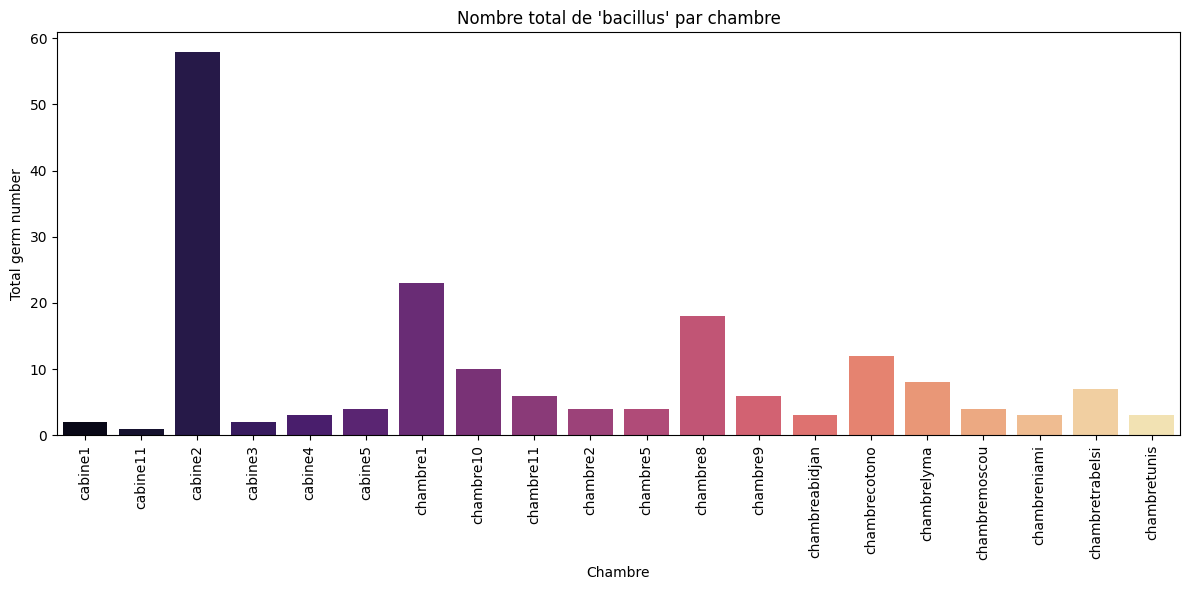

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


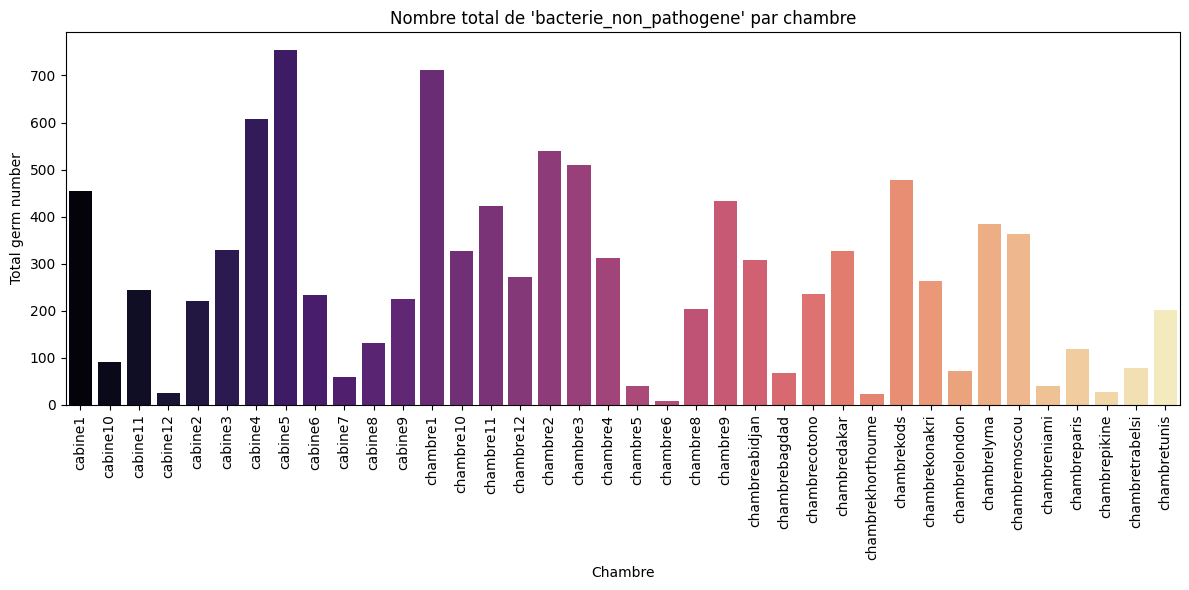

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


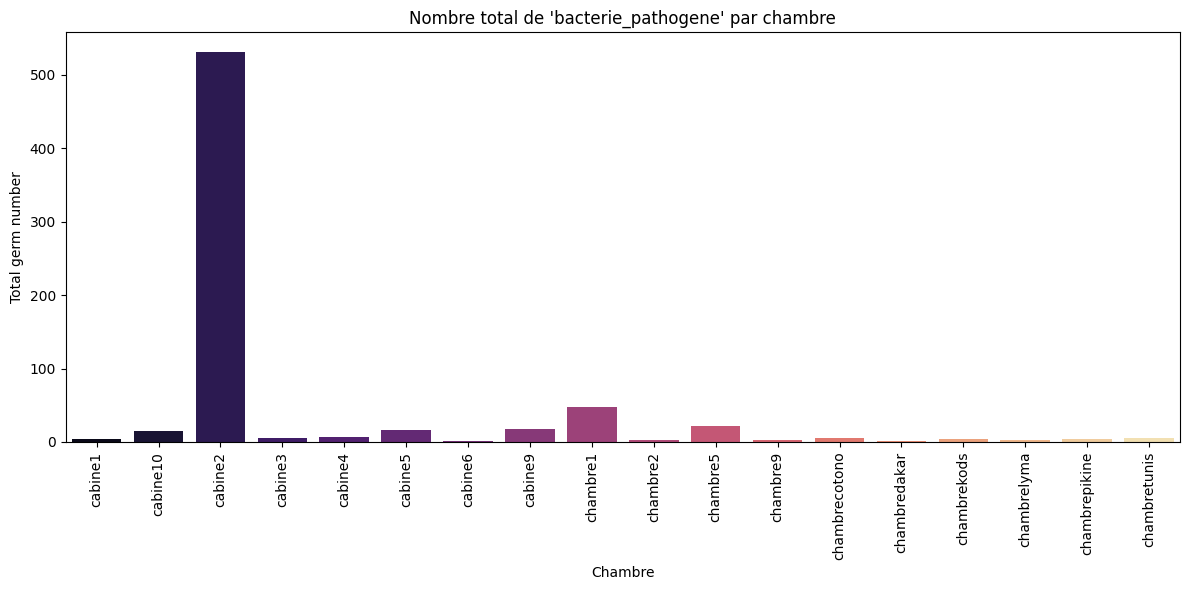

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


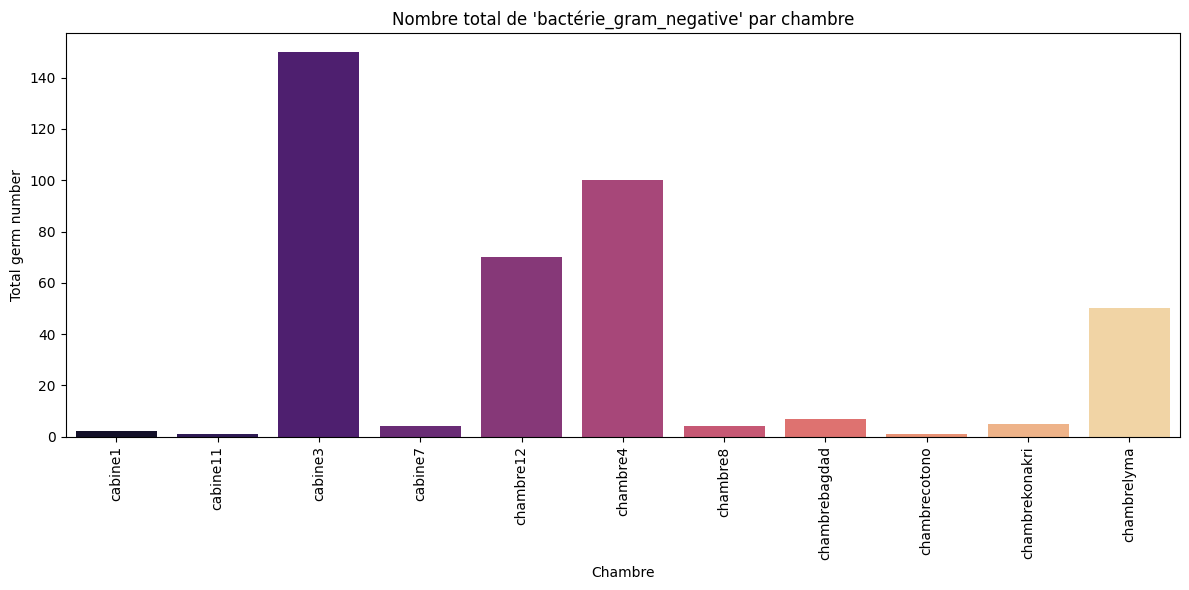

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


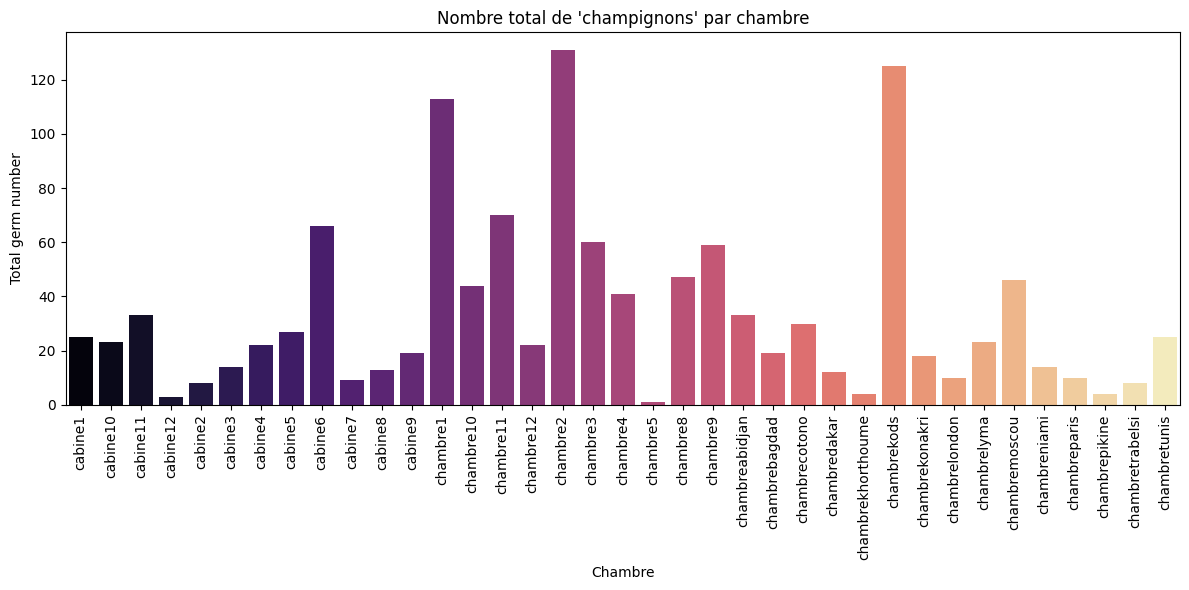

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


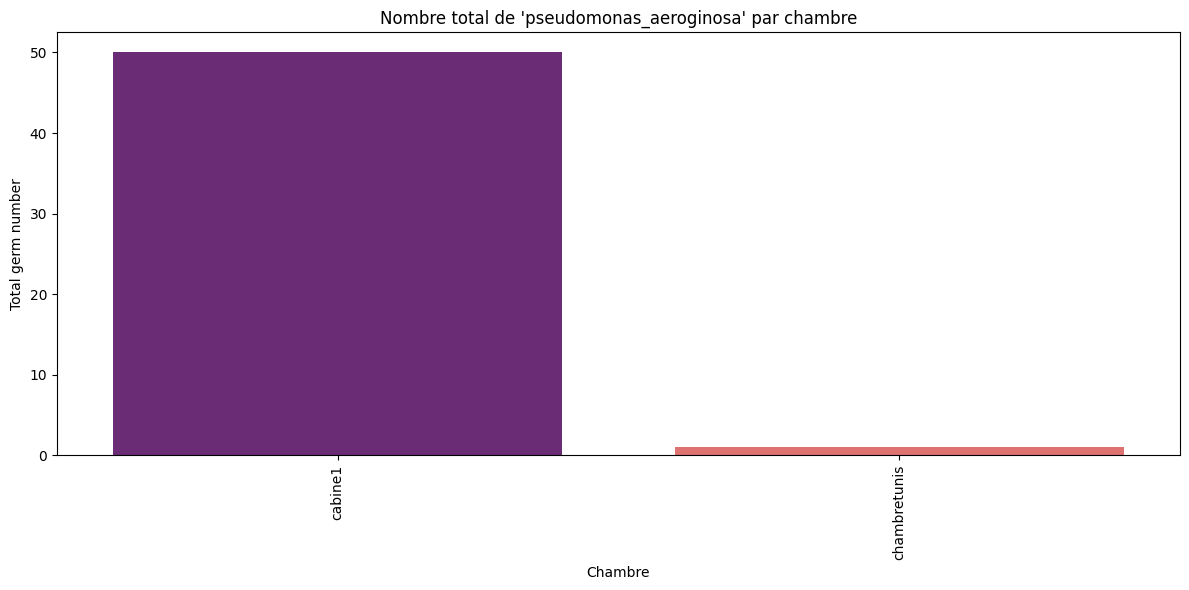

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


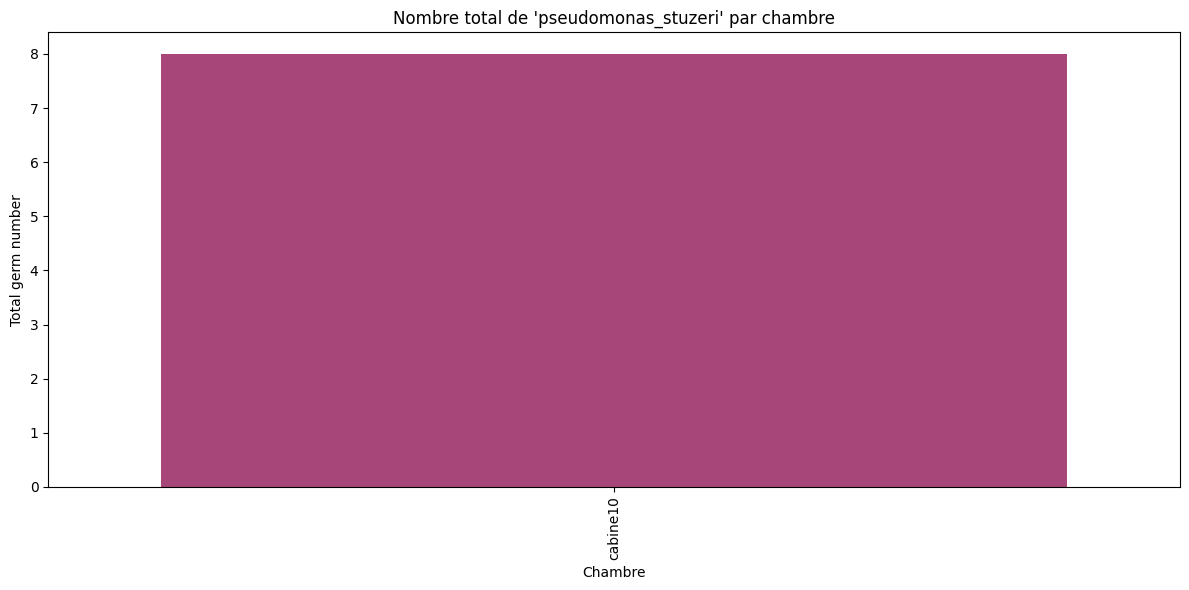

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


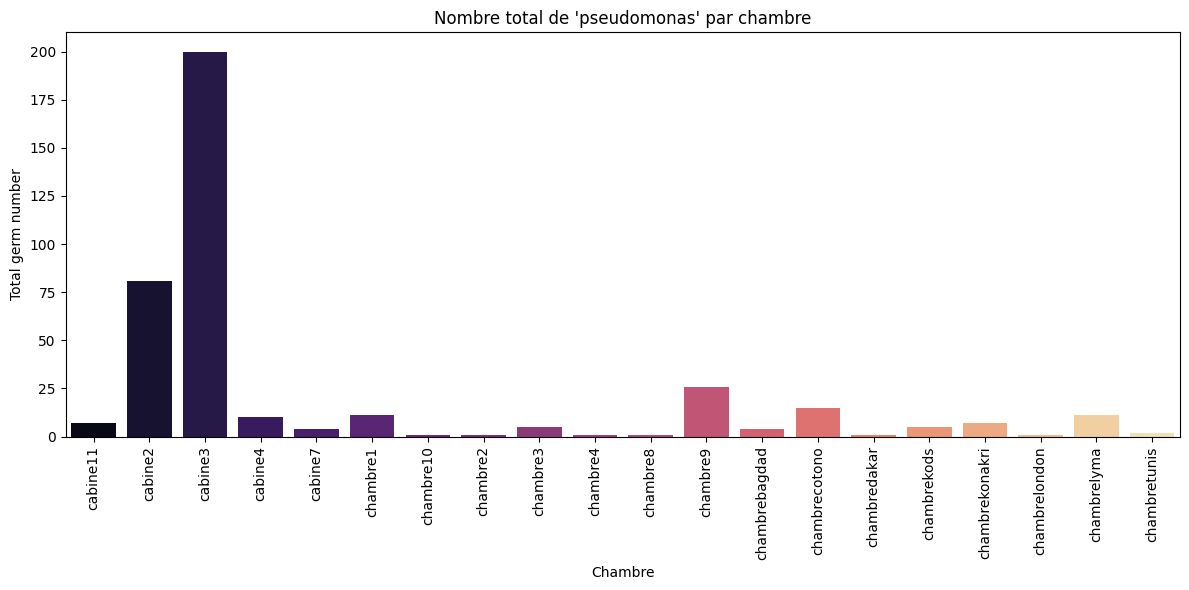

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


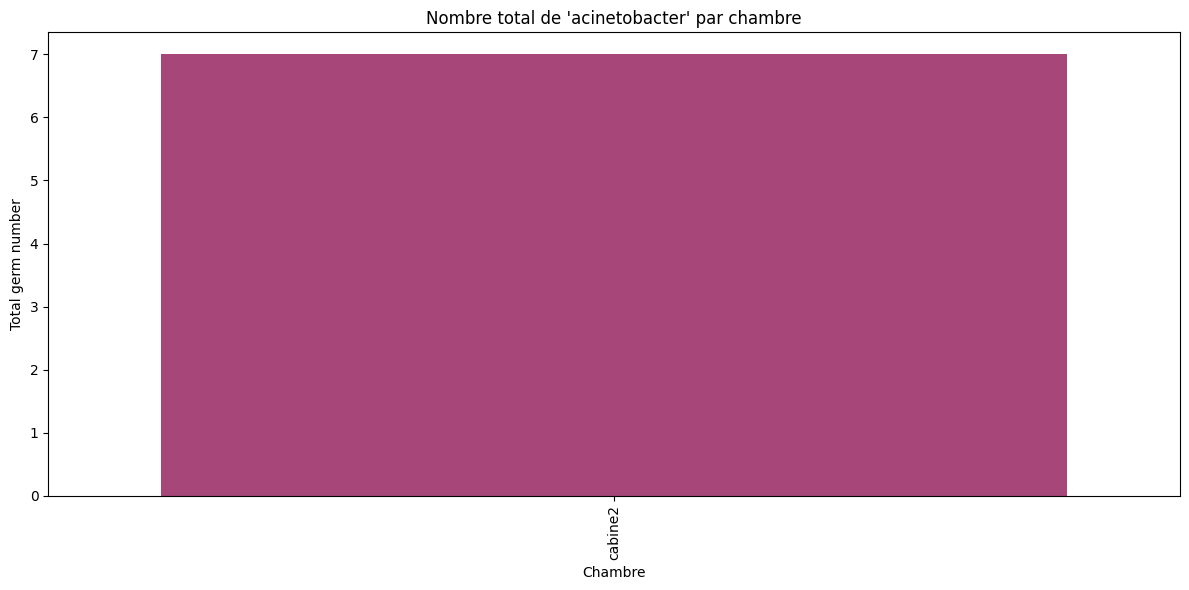

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


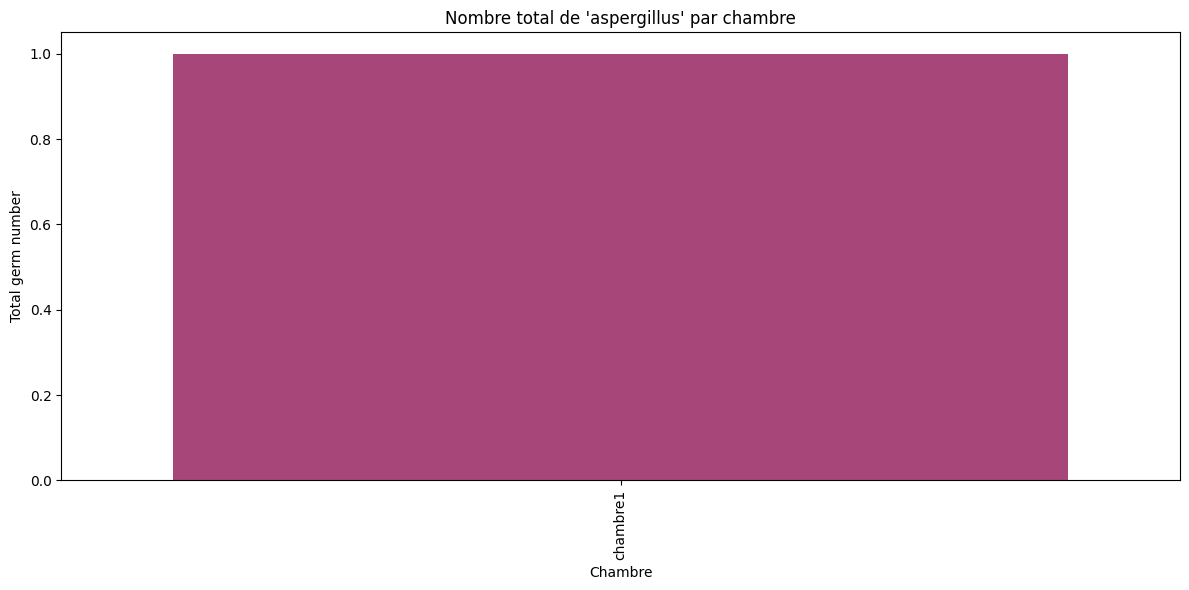

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


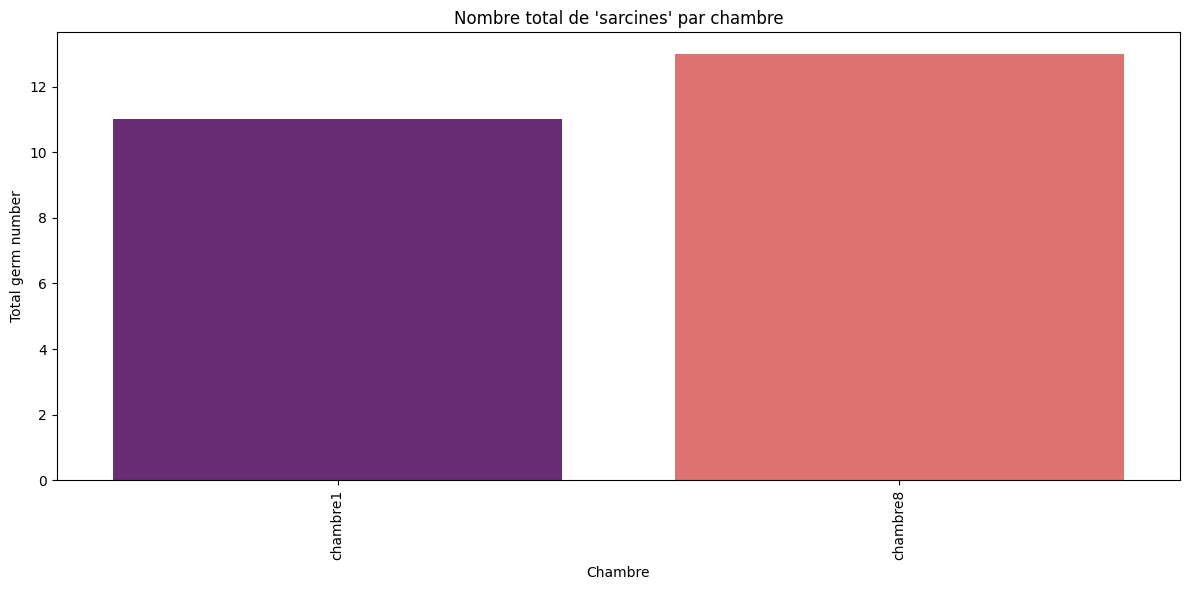

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


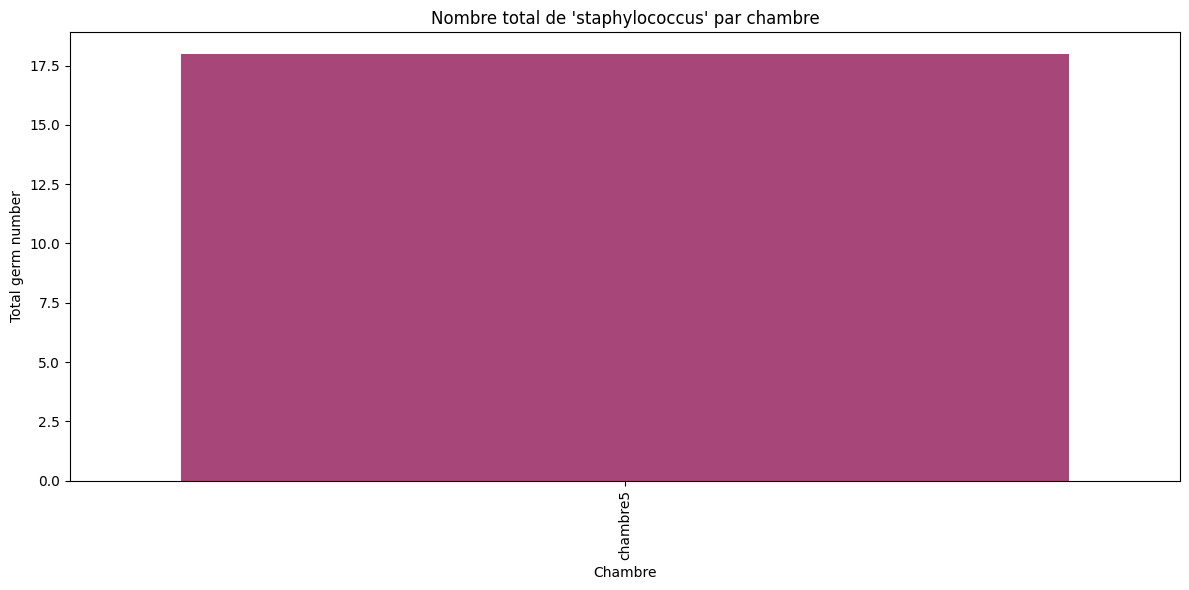

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


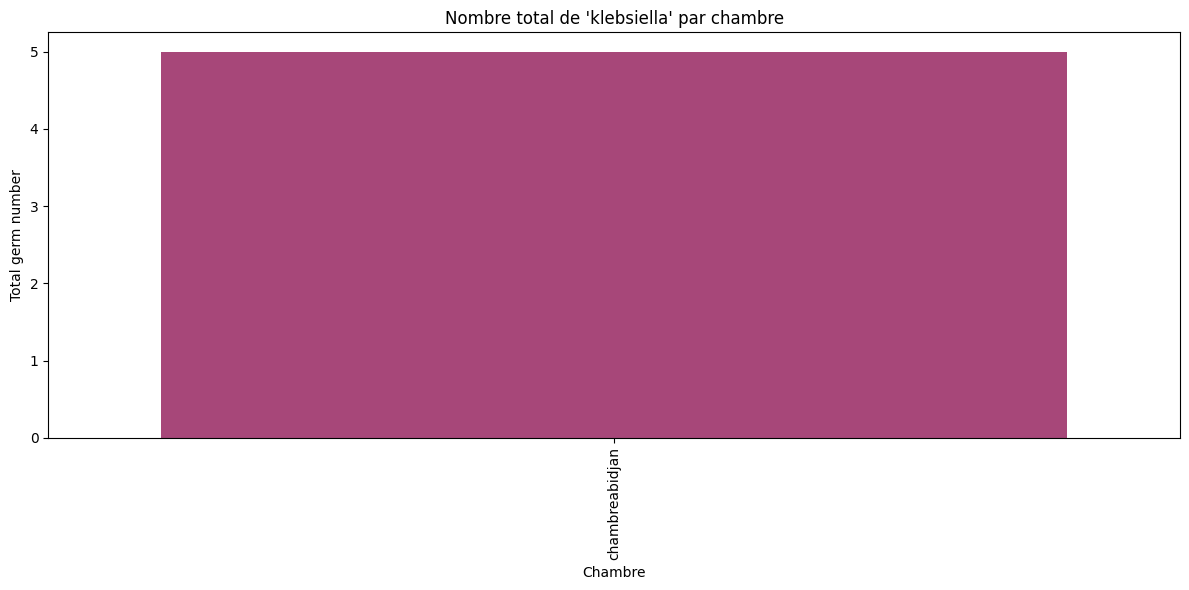

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


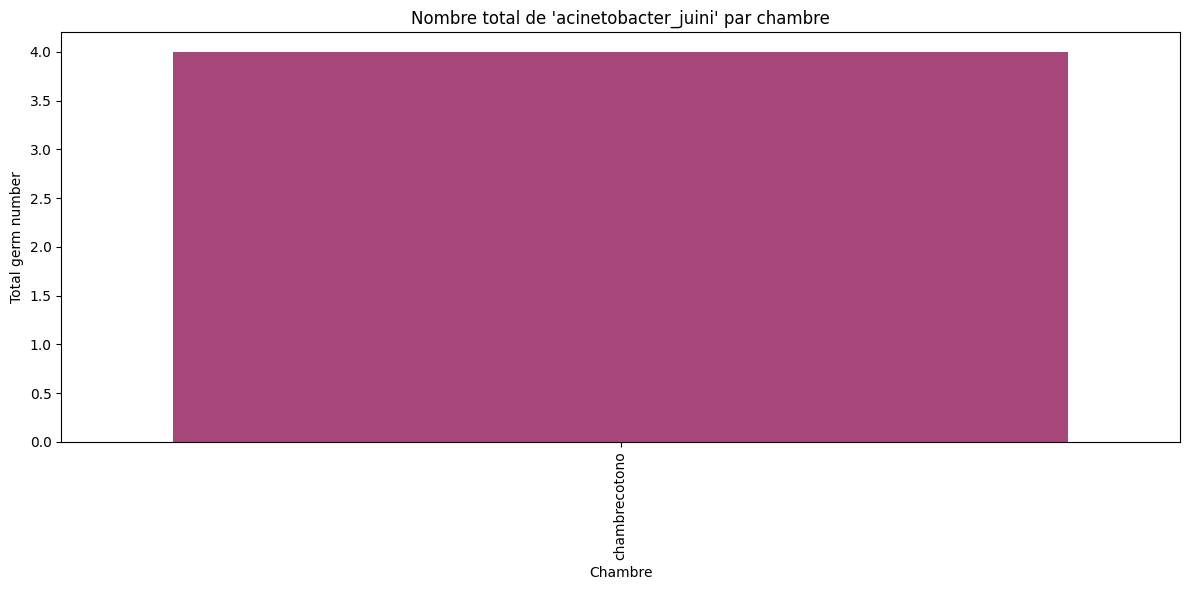

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


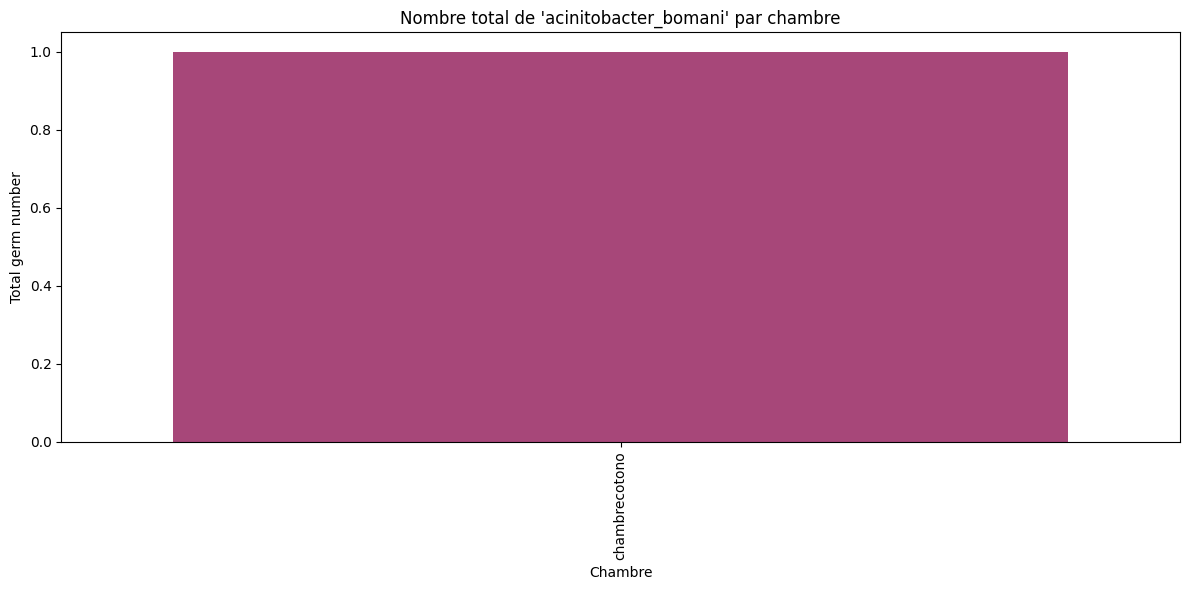

C:\Users\iyedm\AppData\Local\Temp\ipykernel_14160\3494169080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")


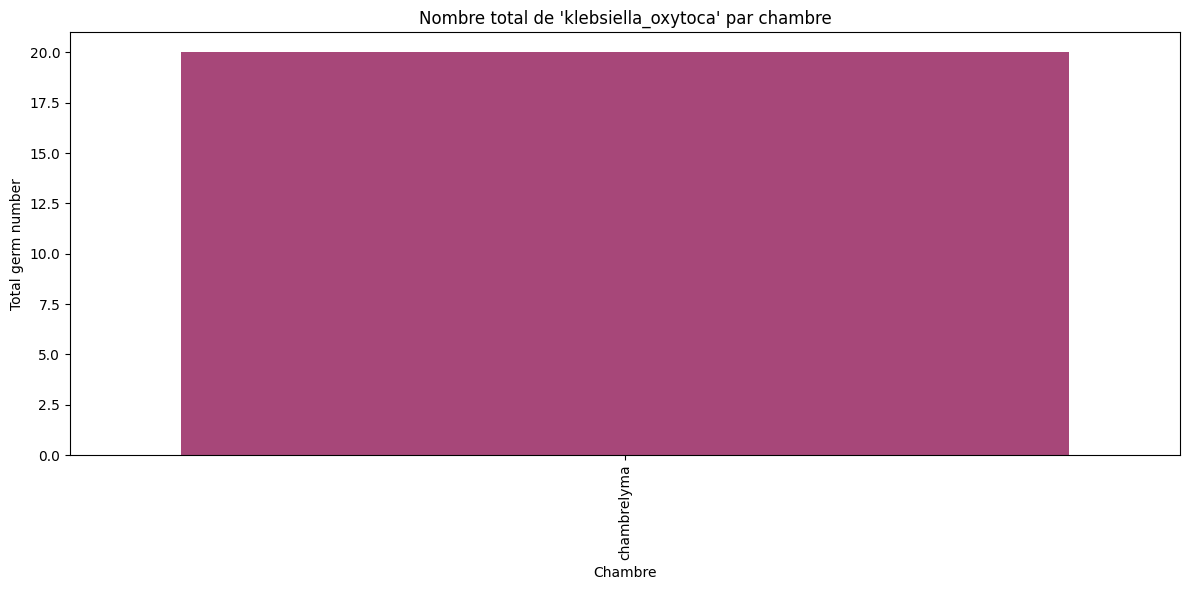

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique germ types
germ_types = germ_sum_df["germ_type"].unique()

# Set figure size per plot
for germ in germ_types:
    plt.figure(figsize=(12, 6))
    data = germ_sum_df[germ_sum_df["germ_type"] == germ]
    
    sns.barplot(data=data, x="chambre", y="total_germs", palette="magma")
    
    plt.title(f"Nombre total de '{germ}' par chambre")
    plt.xticks(rotation=90)
    plt.ylabel("Total germ number")
    plt.xlabel("Chambre")
    plt.tight_layout()
    plt.show()


In [338]:
germ_sum_df.head(10)

,chambre,germ_type,total_germs
0,cabine1,bacillus,2
1,cabine1,bacterie_non_pathogene,454
2,cabine1,bacterie_pathogene,4
3,cabine1,bactérie_gram_negative,2
4,cabine1,champignons,25
5,cabine1,pseudomonas_aeroginosa,50
6,cabine10,bacterie_non_pathogene,90
7,cabine10,bacterie_pathogene,15
8,cabine10,champignons,23
9,cabine10,pseudomonas_stuzeri,8


In [339]:
germ_sum_df.head(10)

,chambre,germ_type,total_germs
0,cabine1,bacillus,2
1,cabine1,bacterie_non_pathogene,454
2,cabine1,bacterie_pathogene,4
3,cabine1,bactérie_gram_negative,2
4,cabine1,champignons,25
5,cabine1,pseudomonas_aeroginosa,50
6,cabine10,bacterie_non_pathogene,90
7,cabine10,bacterie_pathogene,15
8,cabine10,champignons,23
9,cabine10,pseudomonas_stuzeri,8


<span style="color:green; font-size: 18px; font-weight: bold">Tip</span>
```python  
    df[cols] > 0 # returns a dataframe formed by the corresponding columns with bealans in it  
    .sum () # it operates by column by default and it returns a series

```

In [340]:
df['germ_type'].value_counts()

germ_type
bacterie_non_pathogene    1157
champignons                371
bacillus                    53
bacterie_pathogene          37
pseudomonas                 36
bactérie_gram_negative      17
sarcines                     7
staphylococcus               2
pseudomonas_aeroginosa       2
klebsiella_oxytoca           1
pseudomonas_stuzeri          1
acinetobacter                1
aspergillus                  1
klebsiella                   1
acinitobacter_bomani         1
acinetobacter_juini          1
Name: count, dtype: int64

### <span style = "color:orange; font-weight: bold; font-size: 25px">Feature Reduction of Chambre column </span>

In [341]:
# Get unique chambers and germ types
chambers = df["chambre"].unique()
germs = df["germ_type"].unique()

# Create all combinations of (chamber, germ_type)
all_combinations = pd.MultiIndex.from_product(
    [chambers, germs],
    names=["chambre", "germ_type"]
).to_frame(index=False)

# Group the original data to get germ totals per (chambre, germ_type)
germ_totals = (
    df.groupby(["chambre", "germ_type"])["germ_number"]
    .sum()
    .reset_index(name="germ_total_number")
)

# Merge with the full list to fill in missing pairs with 0
result_df = all_combinations.merge(
    germ_totals, on=["chambre", "germ_type"], how="left"
).fillna({"germ_total_number": 0})

# Convert germ_total_number to int
result_df["germ_total_number"] = result_df["germ_total_number"].astype(int)

# Done!
result_df.head()

,chambre,germ_type,germ_total_number
0,chambrelyma,bacterie_non_pathogene,384
1,chambrelyma,bacillus,8
2,chambrelyma,champignons,23
3,chambrelyma,staphylococcus,0
4,chambrelyma,pseudomonas_stuzeri,0


In [342]:
pivot_df = result_df.pivot(
    index="chambre",           # Rows: each chamber
    columns="germ_type",       # Columns: each germ type
    values="germ_total_number" # Values: total germs
)

# Optional: fill NaNs with 0 (if any) and reset index
pivot_df = pivot_df.fillna(0).astype(int).reset_index()

# Done!
pivot_df.head()


germ_type,chambre,acinetobacter,acinetobacter_juini,acinitobacter_bomani,aspergillus,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,klebsiella,klebsiella_oxytoca,pseudomonas,pseudomonas_aeroginosa,pseudomonas_stuzeri,sarcines,staphylococcus
0,cabine1,0,0,0,0,2,454,4,2,25,0,0,0,50,0,0,0
1,cabine10,0,0,0,0,0,90,15,0,23,0,0,0,0,8,0,0
2,cabine11,0,0,0,0,1,243,0,1,33,0,0,7,0,0,0,0
3,cabine12,0,0,0,0,0,24,0,0,3,0,0,0,0,0,0,0
4,cabine2,7,0,0,0,58,221,531,0,8,0,0,81,0,0,0,0


In [343]:
# Assuming pivot_df has 'chambre' as a column and others are germ types
germ_cols = pivot_df.columns.difference(['chambre'])

# Calculate how many chambers have non-zero values for each germ
non_zero_counts = (pivot_df[germ_cols] > 0).sum()

# See how sparse each germ type is
sparsity = non_zero_counts * 100 / len(pivot_df)
sparsity.sort_values() 


germ_type
acinetobacter               2.631579
acinetobacter_juini         2.631579
acinitobacter_bomani        2.631579
aspergillus                 2.631579
pseudomonas_stuzeri         2.631579
staphylococcus              2.631579
klebsiella_oxytoca          2.631579
klebsiella                  2.631579
pseudomonas_aeroginosa      5.263158
sarcines                    5.263158
bactérie_gram_negative     28.947368
bacterie_pathogene         47.368421
pseudomonas                52.631579
bacillus                   52.631579
champignons                97.368421
bacterie_non_pathogene    100.000000
dtype: float64

In [344]:
common_germs = sparsity[sparsity > 10].index
pivot_df = pivot_df[["chambre"] + list(common_germs)]
pivot_df


germ_type,chambre,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas
0,cabine1,2,454,4,2,25,0
1,cabine10,0,90,15,0,23,0
2,cabine11,1,243,0,1,33,7
3,cabine12,0,24,0,0,3,0
4,cabine2,58,221,531,0,8,81
5,cabine3,2,329,6,150,14,200
6,cabine4,3,607,7,0,22,10
7,cabine5,4,754,16,0,27,0
8,cabine6,0,233,1,0,66,0
9,cabine7,0,59,0,4,9,4


<span style= 'color:red; font-weight:bold; font-size:24px'>Clustering Chambers with DBSCAN</span>

eps=0.5, min_samples=2, clusters=2


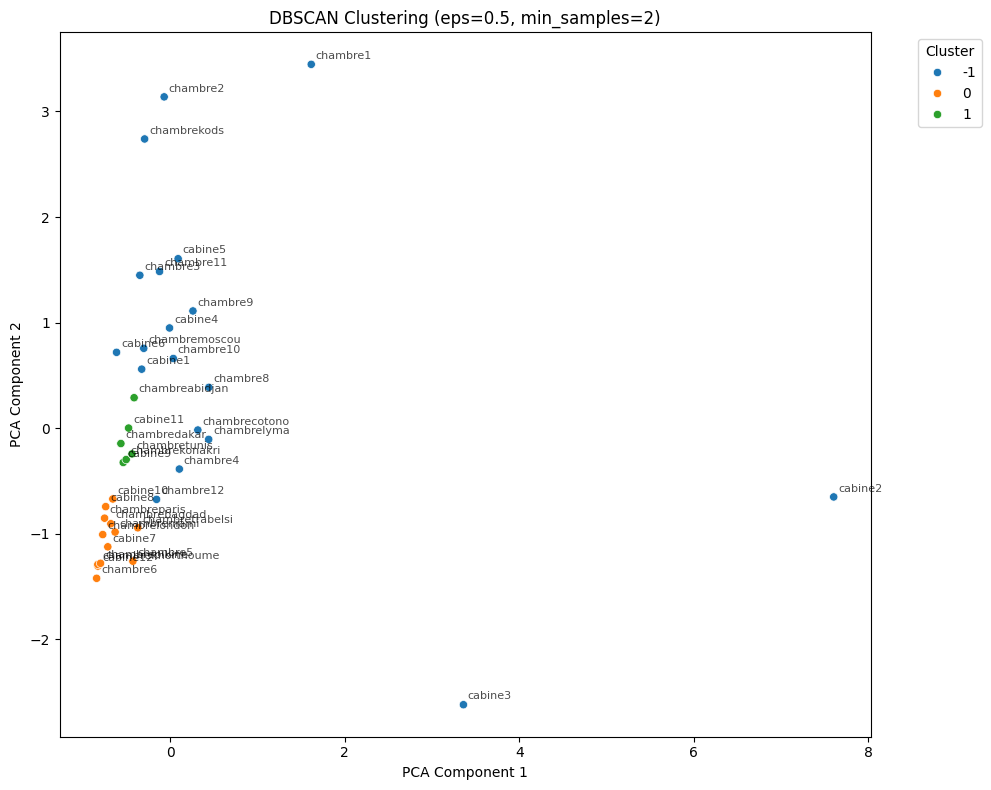

In [345]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Save chamber names
chamber_names = pivot_df["chambre"]

# Prepare data for clustering
X = pivot_df.drop(columns=["chambre"])

# Scale (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA beforehand to reuse across all visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
eps = 0.5
min_samples= 2
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")

# Create a temporary DataFrame for plotting
temp_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "cluster": labels,
    "chambre": pivot_df["chambre"].values
})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=temp_df, x="PCA1", y="PCA2", hue="cluster", palette="tab10", legend="full")

# Add chamber names to each point
for i in range(temp_df.shape[0]):
    plt.text(temp_df.loc[i, "PCA1"] + 0.05, temp_df.loc[i, "PCA2"] + 0.05, temp_df.loc[i, "chambre"], 
                fontsize=8, alpha=0.7)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We cannot drop some chambers: 

In [346]:
df["chambre"].value_counts()

chambre
chambre1             122
chambre9              95
chambre11             92
chambre2              92
cabine4               81
chambre8              75
cabine5               73
chambrelyma           68
cabine3               61
chambre3              61
cabine1               59
cabine2               56
chambrekods           53
chambre10             52
chambre4              52
chambrekonakri        50
chambretunis          48
chambrecotono         45
chambremoscou         45
chambre12             44
cabine9               42
cabine6               42
cabine11              40
chambreabidjan        29
chambreparis          26
cabine8               24
cabine10              22
chambretrabelsi       19
chambrelondon         18
chambre5              17
chambreniami          17
chambrebagdad         17
cabine7               16
chambredakar          16
cabine12               7
chambrepikine          7
chambrekhorthoume      4
chambre6               2
Name: count, dtype: int64

### <span style= "color: orange; font-weight: bold;  font-size: 25px">Handling Disinfectant column </span>

In [347]:
print(f"the number of rows missing the disinfectant is {df[df['Desinfecatant'].isna()].shape[0]}")

the number of rows missing the disinfectant is 0


In [348]:
import re

# For "Desinfecatant" - preserve left-to-right order, no set() (since set scrambles order)
df["Desinfecatant"] = df["Desinfecatant"].str.split(r"[\/+]").apply(
    lambda x: [item.strip().lower() for item in x if item.strip() != '']
)

# For "Volume/Ml" - same idea, keep order
df["Volume/Ml"] = df["Volume/Ml"].astype(str).str.replace(",", '.').str.split(r"[\/+]").apply(
    lambda x: [item for item in x if item.strip() != '']
)


In [349]:
df.head(10)

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
0,2018-02-01,surface,element,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambrelyma,bacterie_non_pathogene,20
1,2018-02-01,surface,lit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretrabelsi,bacillus,4
2,2018-02-01,surface,oreiller,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretrabelsi,bacillus,1
3,2018-02-01,surface,table de nuit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretrabelsi,bacillus,1
4,2018-02-01,lavabos,lavabos,"[javel, ddn suf]","[1.04, 0.17]",1,chambretrabelsi,bacillus,1
5,2018-03-01,surface,lit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretunis,bacterie_non_pathogene,20
6,2018-03-01,surface,table de nuit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretunis,champignons,3
6,2018-03-01,surface,table de nuit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretunis,bacterie_non_pathogene,20
6,2018-03-01,surface,table de nuit,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretunis,bacillus,2
7,2018-03-01,surface,matelas,"[javel, nosocomial spray]","[1.04, 0.034]",1,chambretunis,champignons,4


In [350]:
mismatch = df[df["Volume/Ml"].apply(len) != df["Desinfecatant"].apply(len)]


In [351]:
print(f"number of mismatches between disinfectant and volume is  {mismatch.shape[0]}")

number of mismatches between disinfectant and volume is  83


In [352]:
mismatch

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
174,2018-12-22,Lavabo,Lavabo,"[javel, ddn suf]",[0.740.17],0,chambre9,bacterie_non_pathogene,100
189,2022-01-03,lavabo,lavabo,"[javel, javel, ddn surf]","[1.04, 0.103]",1,chambre1,champignons,1
192,2022-01-04,lavabo,lavabo,"[javel, javel, ddn surf]","[1.04, 0.103]",1,cabine4,bacterie_non_pathogene,2
219,2022-02-10,surface,lit,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,1
220,2022-02-10,surface,Matelas,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,25
221,2022-02-10,surface,Oreiller,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,4
222,2022-02-10,surface,potence,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,30
223,2022-02-10,surface,chaise percée,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,30
224,2022-02-10,surface,interphone,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,2
225,2022-02-10,surface,mur,"[javel, phgo spry]",[1.090.031],1,cabine4,bacterie_non_pathogene,1


In [353]:
def func(x):
    s = x[0]
    first_occ = s.find('.')
    if (len(x) == 2 or first_occ == -1):
        return x
    sec_occ = s.find('.', first_occ + 1)
    r= [s[:sec_occ - 1], s[sec_occ -1 :]]
    return r

In [354]:
r= func(['0.960.62'])
r

['0.96', '0.62']

In [355]:
df["Volume/Ml"] = df["Volume/Ml"].apply(lambda x : func(x))


In [356]:
mismatch = df[df["Volume/Ml"].apply(len) != df["Desinfecatant"].apply(len)]
mismatch

,Date,Type,lieu(point de prelevement),Desinfecatant,Volume/Ml,category,chambre,germ_type,germ_number
189,2022-01-03,lavabo,lavabo,"[javel, javel, ddn surf]","[1.04, 0.103]",1,chambre1,champignons,1
192,2022-01-04,lavabo,lavabo,"[javel, javel, ddn surf]","[1.04, 0.103]",1,cabine4,bacterie_non_pathogene,2
262,2022-04-13,lavabo,lavabo,"[javel, javel, ddn surf]","[1.198, 0.031]",1,cabine1,bacterie_non_pathogene,10
273,2022-04-13,lavabo,lavabo,"[javel, javel, ddn surf]","[0.830, 0.086]",0,chambre12,bactérie_gram_negative,50
273,2022-04-13,lavabo,lavabo,"[javel, javel, ddn surf]","[0.830, 0.086]",0,chambre12,champignons,1
283,2022-04-14,lavabo,lavabo,"[javel, javel, ddn surf]","[0.83, 0.086]",0,chambre11,bacterie_non_pathogene,20
291,2022-04-18,lavabo,lavabo,"[javel, javel, ddn surf]","[0.83, 0.086]",0,chambre9,bacterie_non_pathogene,2
291,2022-04-18,lavabo,lavabo,"[javel, javel, ddn surf]","[0.83, 0.086]",0,chambre9,champignons,2
305,2022-05-27,lavabo,lavabo,"[javel, javel, ddn surf]","[0.85, 0.086]",0,chambre12,champignons,2
316,2022-06-06,lavabo,lavabo,"[javel, javel, ddn surf]","[1.301, 0.156]",1,cabine5,bacterie_non_pathogene,6


In [357]:
print(f"the number of rows where there is mismatch between disinfectants and volume is {mismatch.shape[0]}")

the number of rows where there is mismatch between disinfectants and volume is 55


In [358]:
exploded_data = []
for idx, row in df.iterrows():
    desinf_list = row["Desinfecatant"] if isinstance(row["Desinfecatant"], list) else []
    volume_list = row["Volume/Ml"] if isinstance(row["Volume/Ml"], list) else []
    # Use the minimum length to avoid index errors
    pair_len = min(len(desinf_list), len(volume_list))
    for i in range(pair_len):
        new_row = row.drop(["Desinfecatant", "Volume/Ml"]).to_dict()
        new_row["Desinfecatant"] = desinf_list[i]
        new_row["Volume/Ml"] = volume_list[i]
        exploded_data.append(new_row)

# Step 3: Convert the list of dictionaries back to a DataFrame
df = pd.DataFrame(exploded_data)

In [359]:
print(f"Number of Disinfectants used is {df['Desinfecatant'].nunique()}")

Number of Disinfectants used is 8


In [360]:
df['Desinfecatant'].value_counts()

Desinfecatant
javel                  1707
nosocomia surf spae     836
phgo spry               419
nosocomial spray        201
ddn surf                 70
stera surf               52
nocolis                  37
ddn suf                  19
Name: count, dtype: int64

In [361]:
df['Desinfecatant'].isna().sum()

np.int64(0)

In [362]:
df['Volume/Ml'].isna().sum()

np.int64(0)

In [363]:
df.dtypes

Date                          datetime64[ns]
Type                                  object
lieu(point de prelevement)            object
category                               int64
chambre                               object
germ_type                             object
germ_number                            int64
Desinfecatant                         object
Volume/Ml                             object
dtype: object

In [364]:
def is_convertible_to_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False


In [365]:
# Identify values that cause conversion issues
problematic_values = df[~df['Volume/Ml'].apply(lambda x: is_convertible_to_float(x))]



In [366]:
problematic_values

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
466,2022-01-04,surface,lit,1,cabine4,bacterie_non_pathogene,1,phgo spry,0.0.301
468,2022-01-04,surface,Matelas,1,cabine4,bacterie_non_pathogene,50,phgo spry,0.0.301
790,2022-07-26,surface,lit,1,cabine1,bacterie_non_pathogene,2,phgo spry,0.10.031
792,2022-07-26,surface,element,1,cabine1,bacterie_non_pathogene,1,phgo spry,0.10.031
1178,2022-09-27,Lavabo,Lavabo,1,cabine2,bacillus,50,javel,0.0.21
1658,2023-02-14,surface,Lit,1,cabine4,bacterie_non_pathogene,2,nosocomia surf spae,0.0.031
1660,2023-02-14,surface,Matelas,1,cabine4,bacterie_non_pathogene,3,nosocomia surf spae,0.0.031
1662,2023-02-14,surface,interphone,1,cabine4,bacterie_non_pathogene,1,nosocomia surf spae,0.0.031
1782,2023-03-01,surface,Lit,1,cabine3,bacterie_non_pathogene,1,nosocomia surf spae,0.0.031
1998,2023-05-18,surface,Lit,1,cabine4,bacterie_non_pathogene,1,nosocomia surf spae,0.0.086


In [367]:
print(f"number of ambiguous values for disinfectant quantity is {problematic_values.shape[0]}")

number of ambiguous values for disinfectant quantity is 33


After visualizing the different used quantities of the problematic germs we figure out the true values  
``` python  
df[df['Desinfecatant '] == 'nosocomia surf spae']  
df[df['Desinfecatant '] == 'javel']  
df[df['Desinfecatant '] == 'nosocomia surf spae	']  
df[df['Desinfecatant '] == 'ddn surf']
```

In [368]:
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.09', '0.09', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.086', '0.086', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.031', '0.031', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.26', '0.026', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('1..04', '1.04', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.21', '0.21', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.10.031', '0.031', regex=False)
df['Volume/Ml'] = df['Volume/Ml'].str.replace('0.0.301', '0.031', regex=False)

In [369]:
# Identify values that cause conversion issues
problematic_values = df[~df['Volume/Ml'].apply(lambda x: is_convertible_to_float(x))]


In [370]:
problematic_values

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml


In [371]:
df['Volume/Ml'] = df['Volume/Ml'].astype('float64')

Normalizing the disinfectant quantity used for air to L 750mL = 0.75L

In [372]:
df[df['Volume/Ml']> 10]

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
50,2018-02-02,air,air,1,cabine5,bacterie_non_pathogene,2,nocolis,750.0
59,2018-02-12,air,air,0,chambre10,bacterie_non_pathogene,50,nocolis,750.0
60,2018-02-12,air,air,0,chambre10,bacillus,10,nocolis,750.0
61,2018-02-12,air,air,0,chambre10,champignons,1,nocolis,750.0
66,2018-02-19,air,air,0,chambre1,bacillus,5,nocolis,750.0
67,2018-02-19,air,air,0,chambre1,bacterie_non_pathogene,10,nocolis,750.0
74,2024-02-19,air,air,0,chambre9,bacterie_non_pathogene,20,nocolis,750.0
75,2024-02-19,air,air,0,chambre9,bacillus,5,nocolis,750.0
90,2018-03-27,air,air,0,cabine2,acinetobacter,7,nocolis,750.0
107,2018-05-04,air,air,1,chambrekonakri,bacterie_non_pathogene,10,nocolis,750.0


In [373]:
df.loc[df['Volume/Ml'] > 10, 'Volume/Ml'] = df.loc[df['Volume/Ml'] > 10, 'Volume/Ml'] / 1000


In [374]:
df['Volume/Ml'].max()

np.float64(1.301)

In [375]:
df.head(10)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,element,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,element,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
8,2018-02-01,lavabos,lavabos,1,chambretrabelsi,bacillus,1,javel,1.040
9,2018-02-01,lavabos,lavabos,1,chambretrabelsi,bacillus,1,ddn suf,0.170


In [376]:
df['Volume/Ml'].isna().sum()

np.int64(0)

### <span style = "color:orange; font-weight:bold; font-size: 25px">Handling the Cleaned Point Column </span>

In [377]:
cleaning_points = df["lieu(point de prelevement)"]
cleaning_points.value_counts()

lieu(point de prelevement)
lit                      214
potence                  214
Lavabo                   192
lavabo                   188
Matelas                  186
Potence                  162
element                  148
table de nuit            136
oreiller                 132
poignée de porte         132
Lit                      122
Déssus éclérage          120
table de lit             114
matelas                  102
chaise                    92
Table de lit              90
Chaise percée             84
Poignée de porte          82
mur                       72
Element                   70
chaise percée             58
Table de nuit             54
Chaise                    54
interphone                44
Mur                       38
dessus eclairage          36
Elément                   36
Oreiller                  32
dessus eclairege          26
Chaise                    22
air                       18
Poignée porte             18
Interphone                18
dessus declairag

In [378]:
df["lieu(point de prelevement)"].nunique()

82

In [379]:
import pandas as pd
import re
from difflib import SequenceMatcher


from difflib import SequenceMatcher

def char_similarity(a, b):
    return SequenceMatcher(None, str(a).lower(), str(b).lower()).ratio()


def cluster_generator(column, threshold):
    column = list(column)
    clusters= {}
    cluster_id = 0
    for i in range(len(column)):
        alone = True
        if column[i] not in clusters:
            for j in range(i+1, len(column)):
                if (char_similarity(column[i], column[j]) > threshold):
                    clusters[column[i]] = cluster_id
                    clusters[column[j]] = cluster_id                                       
                    alone = False
            if alone == True:
                clusters[column[i]] = -1
            else:
                cluster_id += 1 
    return clusters

In [380]:
cleaning_points_cluster = cluster_generator(cleaning_points, threshold=0.7)
cleaning_points_cluster

{'element': 0,
 'Elément': 0,
 'Eléments': 0,
 'Element': 0,
 'lit': 1,
 'Lit': 1,
 'oreiller': 2,
 'Oreiller': 2,
 'table de nuit': 3,
 'table de lit': 3,
 'Table de lit': 3,
 'table de nuit ': 3,
 'Table de nuit': 3,
 'TABLE DE NUIT': 3,
 'TABLE DE Lit': 3,
 'Tale de nuit': 3,
 'tale de nuit': 3,
 'tale de lit': 3,
 'table de lit ': 3,
 'lavabos': 4,
 'lavabo': 4,
 'Lavabo': 4,
 'matelas': 5,
 'Matelas': 5,
 'chaise ': 6,
 'chaise': 6,
 'Chaise': 6,
 'Chaise ': 6,
 'CHAISE': 6,
 'potence': 7,
 'Potence': 7,
 'POTENCE': 7,
 'Potence ': 7,
 'potence ': 7,
 'chaise percée': 8,
 'Chaise percée': 8,
 'air': 9,
 'paillasse': 10,
 'POIGNET': 11,
 'point 1': 16,
 'point 2': 16,
 'point 3': 16,
 'Poignée': 11,
 'dessus eclairage': 12,
 'dessus eclairege': 12,
 'Déssus éclérage': 12,
 "Déssus d'éclairage": 12,
 'Dessus eclairage': 12,
 'dessus declairage': 12,
 "dessus d'eclairage": 12,
 'POIGNET DE PORTE': 13,
 'poigné de porte': 13,
 'poignée de porte': 13,
 'poigniée de porte': 13,
 'Poigné

In [381]:
cleaning_points_cluster.update({'table de nuit': 28, 'table de nuit ': 28, 'Table de nuit': 28, 'TABLE DE NUIT': 28, 'Tale de nuit': 28, 'tale de nuit': 28 })

In [382]:
cleaning_points_cluster

{'element': 0,
 'Elément': 0,
 'Eléments': 0,
 'Element': 0,
 'lit': 1,
 'Lit': 1,
 'oreiller': 2,
 'Oreiller': 2,
 'table de nuit': 28,
 'table de lit': 3,
 'Table de lit': 3,
 'table de nuit ': 28,
 'Table de nuit': 28,
 'TABLE DE NUIT': 28,
 'TABLE DE Lit': 3,
 'Tale de nuit': 28,
 'tale de nuit': 28,
 'tale de lit': 3,
 'table de lit ': 3,
 'lavabos': 4,
 'lavabo': 4,
 'Lavabo': 4,
 'matelas': 5,
 'Matelas': 5,
 'chaise ': 6,
 'chaise': 6,
 'Chaise': 6,
 'Chaise ': 6,
 'CHAISE': 6,
 'potence': 7,
 'Potence': 7,
 'POTENCE': 7,
 'Potence ': 7,
 'potence ': 7,
 'chaise percée': 8,
 'Chaise percée': 8,
 'air': 9,
 'paillasse': 10,
 'POIGNET': 11,
 'point 1': 16,
 'point 2': 16,
 'point 3': 16,
 'Poignée': 11,
 'dessus eclairage': 12,
 'dessus eclairege': 12,
 'Déssus éclérage': 12,
 "Déssus d'éclairage": 12,
 'Dessus eclairage': 12,
 'dessus declairage': 12,
 "dessus d'eclairage": 12,
 'POIGNET DE PORTE': 13,
 'poigné de porte': 13,
 'poignée de porte': 13,
 'poigniée de porte': 13,
 '

In [383]:
cleaning_points_dict =  {
    0: 'élément',
    1: 'lit',
    2: 'oreiller',
    3: 'table de lit',
    4: 'lavabo',
    5: 'matelas',
    6: 'chaise',
    7: 'potence',
    8: 'chaise percée',
    9: 'air',
    10: 'paillasse',
    11: 'poignet',
    12: 'dessus éclairage',
    13: 'poignée de porte',
    14: 'mur',
    15: 'table',
    16: 'point',
    17: 'interphone',
    18: 'air point',
    19: 'table opératoire',
    20: 'électrode ECG',
    21: 'table de matériel',
    22: 'grand lavabo',
    23: 'mains des personnels',
    24: "chariot d'urgence",
    25: 'surface',
    26: 'drap',
    27: 'pèse-personne',
    28: 'table de nuit'
}


In [384]:
keyMap = {k: cleaning_points_dict[v] for k, v in cleaning_points_cluster.items() if v in cleaning_points_dict}
keyMap

{'element': 'élément',
 'Elément': 'élément',
 'Eléments': 'élément',
 'Element': 'élément',
 'lit': 'lit',
 'Lit': 'lit',
 'oreiller': 'oreiller',
 'Oreiller': 'oreiller',
 'table de nuit': 'table de nuit',
 'table de lit': 'table de lit',
 'Table de lit': 'table de lit',
 'table de nuit ': 'table de nuit',
 'Table de nuit': 'table de nuit',
 'TABLE DE NUIT': 'table de nuit',
 'TABLE DE Lit': 'table de lit',
 'Tale de nuit': 'table de nuit',
 'tale de nuit': 'table de nuit',
 'tale de lit': 'table de lit',
 'table de lit ': 'table de lit',
 'lavabos': 'lavabo',
 'lavabo': 'lavabo',
 'Lavabo': 'lavabo',
 'matelas': 'matelas',
 'Matelas': 'matelas',
 'chaise ': 'chaise',
 'chaise': 'chaise',
 'Chaise': 'chaise',
 'Chaise ': 'chaise',
 'CHAISE': 'chaise',
 'potence': 'potence',
 'Potence': 'potence',
 'POTENCE': 'potence',
 'Potence ': 'potence',
 'potence ': 'potence',
 'chaise percée': 'chaise percée',
 'Chaise percée': 'chaise percée',
 'air': 'air',
 'paillasse': 'paillasse',
 'POIGN

In [385]:
df["lieu(point de prelevement)"] =df["lieu(point de prelevement)"].map(keyMap)

In [386]:
df.head(15)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
8,2018-02-01,lavabos,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040
9,2018-02-01,lavabos,lavabo,1,chambretrabelsi,bacillus,1,ddn suf,0.170


 Let's figure out the real number of distinct cleaned points

In [387]:
df['lieu(point de prelevement)'].value_counts()

lieu(point de prelevement)
potence                 402
lavabo                  386
lit                     336
matelas                 288
poignée de porte        260
élément                 258
dessus éclairage        232
table de lit            210
table de nuit           200
chaise                  190
oreiller                164
chaise percée           142
mur                     110
interphone               62
point                    19
air                      18
grand lavabo             14
air point                 8
table opératoire          8
poignet                   6
table de matériel         6
paillasse                 4
table                     4
électrode ECG             4
drap                      4
mains des personnels      2
chariot d'urgence         2
surface                   2
Name: count, dtype: int64

We will drop the cleaning points that are outliers

In [388]:

percentages = df['lieu(point de prelevement)'].value_counts(normalize=True)

valid_values = percentages[percentages >= 0.004].index

df = df[df['lieu(point de prelevement)'].isin(valid_values)]


In [389]:
df['lieu(point de prelevement)'].isna().sum()

np.int64(0)

In [390]:
df.dtypes

Date                          datetime64[ns]
Type                                  object
lieu(point de prelevement)            object
category                               int64
chambre                               object
germ_type                             object
germ_number                            int64
Desinfecatant                         object
Volume/Ml                            float64
dtype: object

<span style= "color:orange; font-weight:bold; font-size: 25px">Handling Type column </span>

In [391]:
df['Type'].value_counts()

Type
surface    2868
Lavabo      192
lavabo      188
air          19
Air          18
lavabos       6
Name: count, dtype: int64

In [392]:
keyMap = {'surface': 'surface','lavabos': 'lavabo','air':'air', 'lavabo': 'lavabo', 'Lavabo': 'lavabo', 'Air':'air'}

In [393]:
df['Type'] =df['Type'].map(keyMap)

In [394]:
df['Type'].unique()

array(['surface', 'lavabo', 'air'], dtype=object)

In [395]:
df['Type'].isna().sum()

np.int64(0)

In [396]:
df.head(10)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
8,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040
9,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,ddn suf,0.170


In [397]:
df.loc[df["Desinfecatant"] == "ddn suf", "Desinfecatant"] = "ddn surf"

In [398]:
import pandas as pd

# Group and aggregate unique disinfectants
germ_disinfectants = (
    df.groupby('germ_type')['Desinfecatant']
    .unique()
    .reset_index()
    .rename(columns={'Desinfecatant': 'disinfectants'})
)

# Optional: convert to a more readable string for display
germ_disinfectants['disinfectants'] = germ_disinfectants['disinfectants'].apply(lambda x: ', '.join(x))

# Display as a table
print(germ_disinfectants.to_string(index=False))


             germ_type                                                                          disinfectants
         acinetobacter                                                                                nocolis
   acinetobacter_juini                                                                                  javel
  acinitobacter_bomani                                                                       javel, phgo spry
           aspergillus                                                                javel, nosocomial spray
              bacillus                        javel, nosocomial spray, ddn surf, nocolis, nosocomia surf spae
bacterie_non_pathogene javel, nosocomial spray, nocolis, ddn surf, phgo spry, nosocomia surf spae, stera surf
    bacterie_pathogene          javel, nosocomial spray, phgo spry, ddn surf, nosocomia surf spae, stera surf
bactérie_gram_negative                               javel, phgo spry, nocolis, nosocomia surf spae, ddn surf
          

In [399]:
df.head(20)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034
8,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040
9,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,ddn surf,0.170


In [400]:
df.head()

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040


### <span style = "color:orange; font-weight: bold; font-size: 40px">Feature reduction</span>

### <span style = "color:blue; font-weight: bold; font-size: 25px">Feature reduction of chambers </span>

In [401]:
df = df[~df['germ_type'].isin(['acinetobacter', 'acinetobacter_juini', 'acinitobacter_bomani', 'aspergillus', 'klebsiella', 'klebsiella_oxytoca', 'pseudomonas_stuzeri', 'staphylococcus', 'pseudomonas_aeroginosa'])]

In [402]:
import pandas as pd

# Get unique elements (items to clean) and germ types
chambers = df['chambre'].unique()
germs = df['germ_type'].unique()

# Create all combinations of (element, germ_type)
all_combinations = pd.MultiIndex.from_product(
    [chambers, germs],
    names=['chambre', 'germ_type']
).to_frame(index=False)

# Compute mean germ number per (element, germ_type)
mean_value_germs = (
    df.groupby(['chambre', 'germ_type'])['germ_number']
    .mean()
    .reset_index(name="mean_value_germs")
)

# Merge with all combinations and fill missing values with 0
result_df = all_combinations.merge(
    mean_value_germs,
    on=['chambre', 'germ_type'],
    how="left"
).fillna({"mean_value_germs": 0})

# Round to 2 decimals
result_df["mean_value_germs"] = result_df["mean_value_germs"].round(2)

# View result
result_df.head()


,chambre,germ_type,mean_value_germs
0,chambrelyma,bacterie_non_pathogene,8.53
1,chambrelyma,bacillus,3.00
2,chambrelyma,champignons,1.92
3,chambrelyma,pseudomonas,2.20
4,chambrelyma,bacterie_pathogene,3.00


In [403]:
pivot_df = result_df.pivot(
    index="chambre",           # Rows: each chamber
    columns="germ_type",       # Columns: each germ type
    values="mean_value_germs" # Values: total germs
)

# Optional: fill NaNs with 0 (if any) and reset index
pivot_df = pivot_df.fillna(0).astype(int).reset_index()

# Done!
pivot_df.head(10)


germ_type,chambre,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines
0,cabine1,2,9,2,2,10,0,0
1,cabine10,0,6,15,0,8,0,0
2,cabine11,1,9,0,1,3,2,0
3,cabine12,0,4,0,0,1,0,0
4,cabine2,19,5,265,0,2,27,0
5,cabine3,1,7,1,75,1,100,0
6,cabine4,3,9,3,0,2,10,0
7,cabine5,4,12,8,0,2,0,0
8,cabine6,0,7,1,0,6,0,0
9,cabine7,0,6,0,1,2,4,0


In [404]:
# Assuming pivot_df has 'chambre' as a column and others are germ types
germ_cols = pivot_df.columns.difference(['chambre'])

# Calculate how many chambers have non-zero values for each germ
non_zero_counts = (pivot_df[germ_cols] > 0).sum()

# See how sparse each germ type is
sparsity = non_zero_counts * 100 / len(pivot_df)
sparsity.sort_values() 


germ_type
sarcines                    5.405405
bactérie_gram_negative     29.729730
bacterie_pathogene         45.945946
bacillus                   54.054054
pseudomonas                54.054054
bacterie_non_pathogene    100.000000
champignons               100.000000
dtype: float64

In [405]:
##common_germs = sparsity[sparsity > 5].index
##pivot_df = pivot_df[["chambre"] + list(common_germs)]
##pivot_df


eps=0.7, min_samples=2, clusters=1


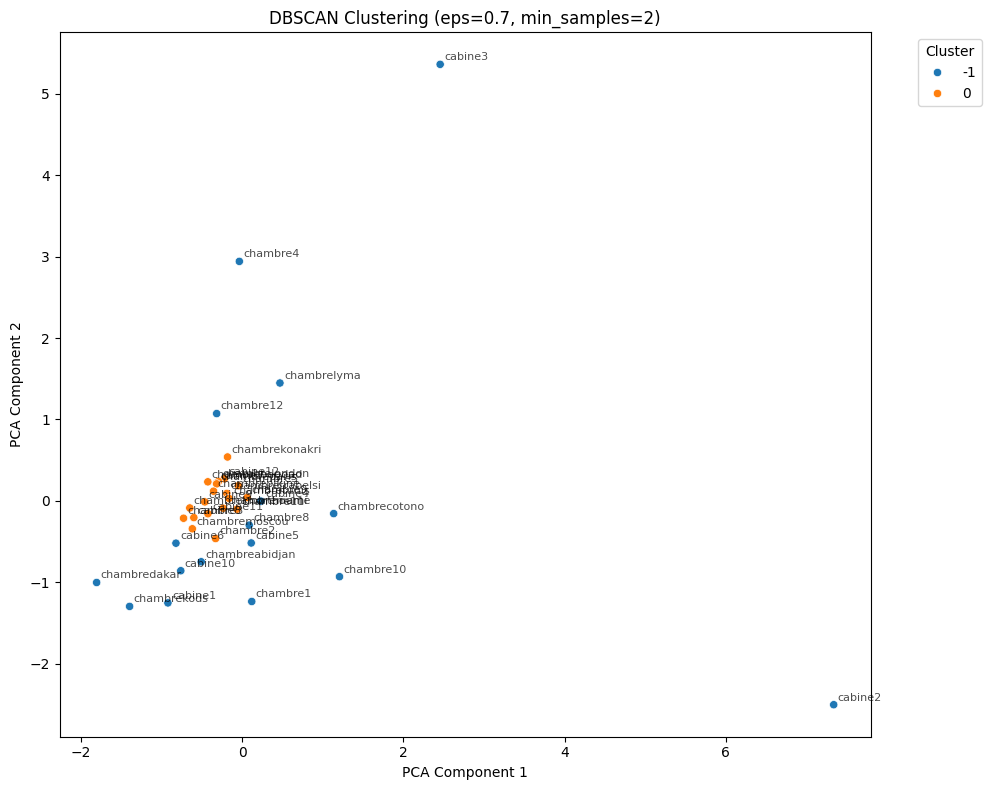

In [406]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Save chamber names
chamber_names = pivot_df["chambre"]

# Prepare data for clustering
X = pivot_df.drop(columns=["chambre"])

# Scale (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA beforehand to reuse across all visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
eps = 0.7
min_samples= 2
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")

# Create a temporary DataFrame for plotting
temp_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "cluster": labels,
    "chambre": pivot_df["chambre"].values
})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=temp_df, x="PCA1", y="PCA2", hue="cluster", palette="tab10", legend="full")

# Add chamber names to each point
for i in range(temp_df.shape[0]):
    plt.text(temp_df.loc[i, "PCA1"] + 0.05, temp_df.loc[i, "PCA2"] + 0.05, temp_df.loc[i, "chambre"], 
                fontsize=8, alpha=0.7)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [407]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data (already done in your code)
X = pivot_df.drop(columns=["chambre"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine number of PCA components to retain 90% variance
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.90).sum() + 1
print(f"Number of components to explain 90% variance: {n_components}")

# Check variance explained by 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"Explained variance by 2 components: {sum(pca_2d.explained_variance_ratio_):.2%}")

# Apply PCA with optimal components for clustering
pca_cluster = PCA(n_components=n_components)
X_pca = pca_cluster.fit_transform(X_scaled)

Number of components to explain 90% variance: 5
Explained variance by 2 components: 50.30%


In [408]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the non-numeric column
X = pivot_df.drop(columns=["chambre"])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to get the first 6 components
pca = PCA(n_components=5)
X_scaled_5d = pca.fit_transform(X_scaled)


In [409]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled_5d)
pivot_df["cluster"] = clusters


In [410]:
pivot_df

germ_type,chambre,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines,cluster
0,cabine1,2,9,2,2,10,0,0,4
1,cabine10,0,6,15,0,8,0,0,4
2,cabine11,1,9,0,1,3,2,0,1
3,cabine12,0,4,0,0,1,0,0,1
4,cabine2,19,5,265,0,2,27,0,2
5,cabine3,1,7,1,75,1,100,0,3
6,cabine4,3,9,3,0,2,10,0,0
7,cabine5,4,12,8,0,2,0,0,0
8,cabine6,0,7,1,0,6,0,0,4
9,cabine7,0,6,0,1,2,4,0,1


### <span style = "color:blue; font-weight: bold; font-size: 25px">Feature reduction of cleaning spots </span>

In [411]:
# Count distinct disinfectants per chamber
disinfectant_count = df.groupby("lieu(point de prelevement)")['Desinfecatant'].nunique()

# Count distinct volumes per chamber
volume_count = df.groupby("lieu(point de prelevement)")['Volume/Ml'].nunique()

# Combine all into one dataframe
diversity_summary = pd.concat(
    [disinfectant_count, volume_count],
    axis=1
).reset_index()

# Rename columns
diversity_summary.columns = [
    "lieu(point de prelevement)",
    "num_disinfectant_types",
    "num_distinct_volumes",
    
]

# Display
print(diversity_summary)


   lieu(point de prelevement)  num_disinfectant_types  num_distinct_volumes
0                         air                       1                     1
1                      chaise                       4                    43
2               chaise percée                       5                    41
3            dessus éclairage                       4                    44
4                grand lavabo                       2                     2
5                  interphone                       3                    26
6                      lavabo                       5                    55
7                         lit                       5                    58
8                     matelas                       5                    54
9                         mur                       4                    37
10                   oreiller                       4                    39
11           poignée de porte                       5                    53
12          

In [412]:
df = df[~df['lieu(point de prelevement)'].isin(['air', 'point', 'grand lavabo'])]
df = df[~df['Desinfecatant'].isin(['nocolis', 'ddn suf'])]

In [413]:
import pandas as pd



# Get unique elements (items to clean) and disinfectants
cleaning_points = df['lieu(point de prelevement)'].unique()
disinfs = df['Desinfecatant'].unique()

# Create all combinations of (element, disinfectant)
all_combinations = pd.MultiIndex.from_product(
    [cleaning_points, disinfs],
    names=['lieu(point de prelevement)', 'Desinfecatant']
).to_frame(index=False)

# Compute mean volume of disinfectant used per (element, disinfectant)
mean_value_disinf = (
    df.groupby(['lieu(point de prelevement)', 'Desinfecatant'])['Volume/Ml']
    .mean()
    .reset_index(name="mean_value_disinf")
)

# Merge with all combinations and fill missing values with 0
result_df = all_combinations.merge(
    mean_value_disinf,
    on=['lieu(point de prelevement)', 'Desinfecatant'],
    how="left"
).fillna({"mean_value_disinf": 0})

# Round to 2 decimals
result_df["mean_value_disinf"] = result_df["mean_value_disinf"].round(2)

#

In [414]:
result_df.head()

,lieu(point de prelevement),Desinfecatant,mean_value_disinf
0,élément,javel,0.91
1,élément,nosocomial spray,0.03
2,élément,ddn surf,0.00
3,élément,phgo spry,0.10
4,élément,nosocomia surf spae,0.06


In [415]:
disinf_pivot_df = result_df.pivot(
    index='lieu(point de prelevement)',           # Rows: each chamber
    columns="Desinfecatant",       # Columns: each germ type
    values="mean_value_disinf" # Values: total germs
)

# Optional: fill NaNs with 0 (if any) and reset index
disinf_pivot_df = disinf_pivot_df.fillna(0).reset_index()

# Done!
disinf_pivot_df


Desinfecatant,lieu(point de prelevement),ddn surf,javel,nosocomia surf spae,nosocomial spray,phgo spry,stera surf
0,chaise,0.00,0.92,0.07,0.06,0.12,0.00
1,chaise percée,0.00,0.83,0.05,0.02,0.05,0.17
2,dessus éclairage,0.00,0.86,0.08,0.05,0.14,0.00
3,interphone,0.00,0.93,0.06,0.00,0.06,0.00
4,lavabo,0.13,0.76,0.13,0.00,0.10,0.29
5,lit,0.00,0.95,0.08,0.04,0.11,0.22
6,matelas,0.00,0.92,0.07,0.04,0.10,0.01
7,mur,0.00,0.99,0.06,0.02,0.09,0.00
8,oreiller,0.00,0.86,0.07,0.06,0.06,0.00
9,poignée de porte,0.02,0.89,0.07,0.06,0.11,0.00


In [416]:
# Assuming pivot_df has 'chambre' as a column and others are germ types
disinf_cols = disinf_pivot_df.columns.difference(['lieu(point de prelevement)'])

# Calculate how many chambers have non-zero values for each germ
non_zero_counts = (disinf_pivot_df[disinf_cols] > 0).sum()

# See how sparse each germ type is
sparsity = non_zero_counts * 100 / len(disinf_pivot_df)
sparsity.sort_values() 

Desinfecatant
ddn surf                21.428571
stera surf              28.571429
nosocomial spray        85.714286
javel                  100.000000
nosocomia surf spae    100.000000
phgo spry              100.000000
dtype: float64

In [417]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data (already done in your code)
X = disinf_pivot_df.drop(columns=['lieu(point de prelevement)'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine number of PCA components to retain 90% variance
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.90).sum() + 1
print(f"Number of components to explain 90% variance: {n_components}")

# Check variance explained by 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"Explained variance by 2 components: {sum(pca_2d.explained_variance_ratio_):.2%}")

# Apply PCA with optimal components for clustering
pca_cluster = PCA(n_components=n_components)
X_pca = pca_cluster.fit_transform(X_scaled)

Number of components to explain 90% variance: 4
Explained variance by 2 components: 78.91%


eps=0.5, min_samples=2, clusters=0


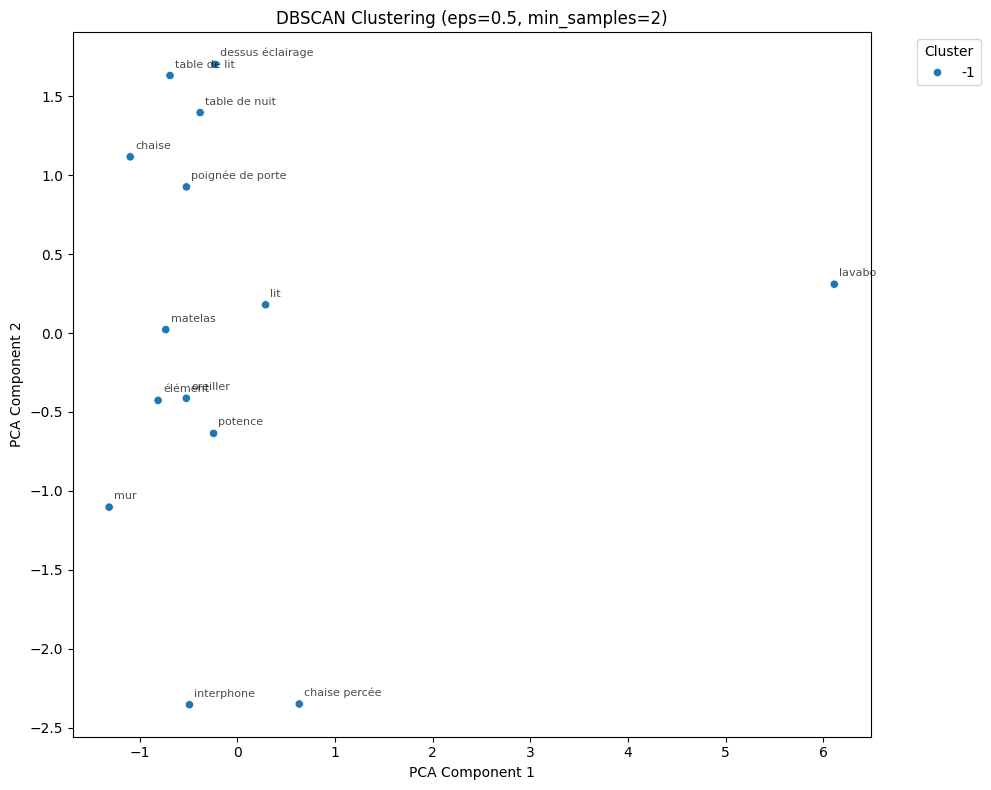

In [418]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Save chamber names
chamber_names = disinf_pivot_df['lieu(point de prelevement)']

# Prepare data for clustering
X = disinf_pivot_df.drop(columns=['lieu(point de prelevement)'])

# Scale (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA beforehand to reuse across all visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
eps = 0.5
min_samples= 2
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")

# Create a temporary DataFrame for plotting
temp_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "cluster": labels,
    'lieu(point de prelevement)': disinf_pivot_df['lieu(point de prelevement)'].values
})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=temp_df, x="PCA1", y="PCA2", hue="cluster", palette="tab10", legend="full")

# Add chamber names to each point
for i in range(temp_df.shape[0]):
    plt.text(temp_df.loc[i, "PCA1"] + 0.05, temp_df.loc[i, "PCA2"] + 0.05, temp_df.loc[i, 'lieu(point de prelevement)'], 
                fontsize=8, alpha=0.7)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Second frame for cleaning points !

In [419]:
import pandas as pd

# Get unique elements (items to clean) and germ types
cleaning_points = df['lieu(point de prelevement)'].unique()
germs = df['germ_type'].unique()

# Create all combinations of (element, germ_type)
all_combinations = pd.MultiIndex.from_product(
    [cleaning_points, germs],
    names=['lieu(point de prelevement)', 'germ_type']
).to_frame(index=False)

# Compute mean germ number per (element, germ_type)
mean_value_germs = (
    df.groupby(['lieu(point de prelevement)', 'germ_type'])['germ_number']
    .mean()
    .reset_index(name="mean_value_germs")
)

# Merge with all combinations and fill missing values with 0
result_df = all_combinations.merge(
    mean_value_germs,
    on=['lieu(point de prelevement)', 'germ_type'],
    how="left"
).fillna({"mean_value_germs": 0})

# Round to 2 decimals
result_df["mean_value_germs"] = result_df["mean_value_germs"].round(2)

# View result
result_df.head()


,lieu(point de prelevement),germ_type,mean_value_germs
0,élément,bacterie_non_pathogene,6.00
1,élément,bacillus,1.60
2,élément,champignons,2.44
3,élément,pseudomonas,1.75
4,élément,bacterie_pathogene,0.00


In [420]:
germ_pivot_df = result_df.pivot(
    index="lieu(point de prelevement)",           # Rows: each chamber
    columns="germ_type",       # Columns: each germ type
    values="mean_value_germs" # Values: total germs
)

# Optional: fill NaNs with 0 (if any) and reset index
germ_pivot_df = germ_pivot_df.fillna(0).astype(int).reset_index()

# Done!
germ_pivot_df.head(15)


germ_type,lieu(point de prelevement),bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines
0,chaise,2,13,1,0,2,2,0
1,chaise percée,3,9,1,2,6,4,4
2,dessus éclairage,2,9,21,0,5,1,0
3,interphone,0,6,0,1,1,0,0
4,lavabo,8,9,91,75,3,24,0
5,lit,2,8,2,1,1,0,0
6,matelas,2,7,9,50,2,1,0
7,mur,0,4,0,1,1,0,0
8,oreiller,2,14,4,1,2,0,2
9,poignée de porte,4,6,3,4,2,15,1


In [421]:
len(df)

3222

In [422]:
# Assuming pivot_df has 'chambre' as a column and others are germ types
germ_cols = germ_pivot_df.columns.difference(["lieu(point de prelevement)"])

# Calculate how many chambers have non-zero values for each germ
non_zero_counts = (germ_pivot_df[germ_cols] > 0).sum()

# See how sparse each germ type is
sparsity = non_zero_counts * 100 / len(germ_pivot_df)
sparsity.sort_values() 




germ_type
sarcines                   42.857143
pseudomonas                71.428571
bactérie_gram_negative     78.571429
bacterie_pathogene         78.571429
bacillus                   85.714286
bacterie_non_pathogene    100.000000
champignons               100.000000
dtype: float64

In [423]:
common_germs = sparsity[sparsity > 40].index
germ_pivot_df = germ_pivot_df[["lieu(point de prelevement)"] + list(common_germs)]

In [424]:
germ_pivot_df.head(10)

germ_type,lieu(point de prelevement),bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines
0,chaise,2,13,1,0,2,2,0
1,chaise percée,3,9,1,2,6,4,4
2,dessus éclairage,2,9,21,0,5,1,0
3,interphone,0,6,0,1,1,0,0
4,lavabo,8,9,91,75,3,24,0
5,lit,2,8,2,1,1,0,0
6,matelas,2,7,9,50,2,1,0
7,mur,0,4,0,1,1,0,0
8,oreiller,2,14,4,1,2,0,2
9,poignée de porte,4,6,3,4,2,15,1


We merge the both of pivots

In [425]:
combined_pivot = pd.merge(
    germ_pivot_df, 
    disinf_pivot_df, 
    on='lieu(point de prelevement)', 
    how='outer'  # or 'inner' if you only want rows that appear in both
)

In [426]:
combined_pivot

,lieu(point de prelevement),bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines,ddn surf,javel,nosocomia surf spae,nosocomial spray,phgo spry,stera surf
0,chaise,2,13,1,0,2,2,0,0.00,0.92,0.07,0.06,0.12,0.00
1,chaise percée,3,9,1,2,6,4,4,0.00,0.83,0.05,0.02,0.05,0.17
2,dessus éclairage,2,9,21,0,5,1,0,0.00,0.86,0.08,0.05,0.14,0.00
3,interphone,0,6,0,1,1,0,0,0.00,0.93,0.06,0.00,0.06,0.00
4,lavabo,8,9,91,75,3,24,0,0.13,0.76,0.13,0.00,0.10,0.29
5,lit,2,8,2,1,1,0,0,0.00,0.95,0.08,0.04,0.11,0.22
6,matelas,2,7,9,50,2,1,0,0.00,0.92,0.07,0.04,0.10,0.01
7,mur,0,4,0,1,1,0,0,0.00,0.99,0.06,0.02,0.09,0.00
8,oreiller,2,14,4,1,2,0,2,0.00,0.86,0.07,0.06,0.06,0.00
9,poignée de porte,4,6,3,4,2,15,1,0.02,0.89,0.07,0.06,0.11,0.00


<span style= "color: red; font-size: 25px; font-weight: bold;">Visualize the cleaning points (germ number + disinfectant volume) </span>

In [427]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data (already done in your code)
X = combined_pivot.drop(columns=['lieu(point de prelevement)'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine number of PCA components to retain 90% variance
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.90).sum() + 1
print(f"Number of components to explain 90% variance: {n_components}")

# Check variance explained by 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"Explained variance by 2 components: {sum(pca_2d.explained_variance_ratio_):.2%}")

# Apply PCA with optimal components for clustering
pca_cluster = PCA(n_components=n_components)
X_pca = pca_cluster.fit_transform(X_scaled)

Number of components to explain 90% variance: 5
Explained variance by 2 components: 64.53%


eps=0.5, min_samples=2, clusters=0


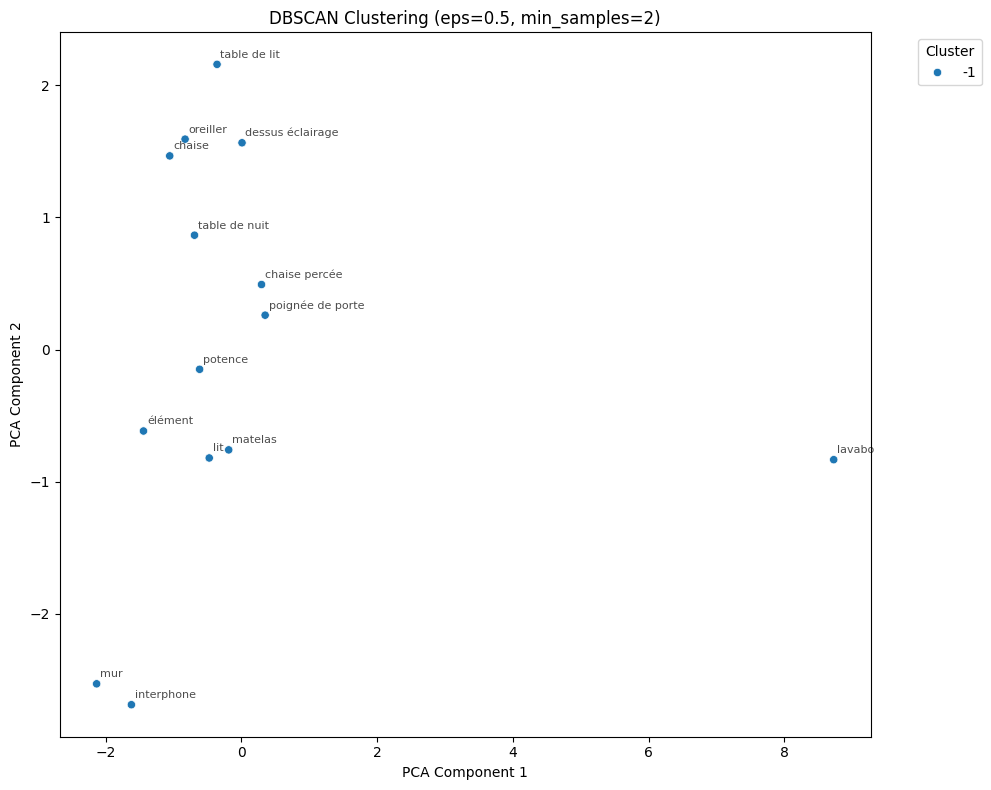

In [428]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Save chamber names
chamber_names = combined_pivot['lieu(point de prelevement)']

# Prepare data for clustering
X = combined_pivot.drop(columns=['lieu(point de prelevement)'])

# Scale (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA beforehand to reuse across all visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
eps = 0.5
min_samples= 2
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")

# Create a temporary DataFrame for plotting
temp_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "cluster": labels,
    'lieu(point de prelevement)': combined_pivot['lieu(point de prelevement)'].values
})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=temp_df, x="PCA1", y="PCA2", hue="cluster", palette="tab10", legend="full")

# Add chamber names to each point
for i in range(temp_df.shape[0]):
    plt.text(temp_df.loc[i, "PCA1"] + 0.05, temp_df.loc[i, "PCA2"] + 0.05, temp_df.loc[i, 'lieu(point de prelevement)'], 
                fontsize=8, alpha=0.7)

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [429]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the non-numeric column
X = combined_pivot.drop(columns=['lieu(point de prelevement)'])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to get the first 6 components
pca = PCA(n_components=6)
X_scaled_6d = pca.fit_transform(X_scaled)


In [430]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled_6d)
combined_pivot["cluster"] = clusters


<span style="color: purple; font-weight:bold; font-size: 25px">Clustering results for chambers and cleaning points </span>

In [431]:
combined_pivot

,lieu(point de prelevement),bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines,ddn surf,javel,nosocomia surf spae,nosocomial spray,phgo spry,stera surf,cluster
0,chaise,2,13,1,0,2,2,0,0.00,0.92,0.07,0.06,0.12,0.00,3
1,chaise percée,3,9,1,2,6,4,4,0.00,0.83,0.05,0.02,0.05,0.17,2
2,dessus éclairage,2,9,21,0,5,1,0,0.00,0.86,0.08,0.05,0.14,0.00,3
3,interphone,0,6,0,1,1,0,0,0.00,0.93,0.06,0.00,0.06,0.00,4
4,lavabo,8,9,91,75,3,24,0,0.13,0.76,0.13,0.00,0.10,0.29,1
5,lit,2,8,2,1,1,0,0,0.00,0.95,0.08,0.04,0.11,0.22,0
6,matelas,2,7,9,50,2,1,0,0.00,0.92,0.07,0.04,0.10,0.01,4
7,mur,0,4,0,1,1,0,0,0.00,0.99,0.06,0.02,0.09,0.00,4
8,oreiller,2,14,4,1,2,0,2,0.00,0.86,0.07,0.06,0.06,0.00,3
9,poignée de porte,4,6,3,4,2,15,1,0.02,0.89,0.07,0.06,0.11,0.00,3


In [432]:
pivot_df

germ_type,chambre,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,sarcines,cluster
0,cabine1,2,9,2,2,10,0,0,4
1,cabine10,0,6,15,0,8,0,0,4
2,cabine11,1,9,0,1,3,2,0,1
3,cabine12,0,4,0,0,1,0,0,1
4,cabine2,19,5,265,0,2,27,0,2
5,cabine3,1,7,1,75,1,100,0,3
6,cabine4,3,9,3,0,2,10,0,0
7,cabine5,4,12,8,0,2,0,0,0
8,cabine6,0,7,1,0,6,0,0,4
9,cabine7,0,6,0,1,2,4,0,1


In [433]:
df.head()

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040


In [434]:
# Create a mapping from chambre to cluster
chambre_to_cluster = pivot_df.set_index('chambre')['cluster'].to_dict()

# Map the cluster to the df and store in a new column
df['cluster_chambre'] = df['chambre'].map(chambre_to_cluster)

In [435]:
chambre_to_cluster

{'cabine1': 4,
 'cabine10': 4,
 'cabine11': 1,
 'cabine12': 1,
 'cabine2': 2,
 'cabine3': 3,
 'cabine4': 0,
 'cabine5': 0,
 'cabine6': 4,
 'cabine7': 1,
 'cabine8': 1,
 'cabine9': 1,
 'chambre1': 4,
 'chambre10': 0,
 'chambre11': 1,
 'chambre12': 1,
 'chambre2': 1,
 'chambre3': 1,
 'chambre4': 3,
 'chambre5': 1,
 'chambre8': 1,
 'chambre9': 1,
 'chambreabidjan': 4,
 'chambrebagdad': 1,
 'chambrecotono': 0,
 'chambredakar': 4,
 'chambrekhorthoume': 1,
 'chambrekods': 4,
 'chambrekonakri': 1,
 'chambrelondon': 1,
 'chambrelyma': 1,
 'chambremoscou': 1,
 'chambreniami': 1,
 'chambreparis': 1,
 'chambrepikine': 1,
 'chambretrabelsi': 1,
 'chambretunis': 1}

In [436]:
df.head(10)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040,1
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034,1
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040,1
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034,1
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040,1
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040,1
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1
8,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040,1
9,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,ddn surf,0.170,1


In [437]:
# Create a mapping from chambre to cluster
cleaning_point_to_cluster = combined_pivot.set_index('lieu(point de prelevement)')['cluster'].to_dict()

# Map the cluster to the df and store in a new column
df['cluster_cleaning_point'] = df['lieu(point de prelevement)'].map(cleaning_point_to_cluster)

In [438]:
cleaning_point_to_cluster

{'chaise': 3,
 'chaise percée': 2,
 'dessus éclairage': 3,
 'interphone': 4,
 'lavabo': 1,
 'lit': 0,
 'matelas': 4,
 'mur': 4,
 'oreiller': 3,
 'poignée de porte': 3,
 'potence': 4,
 'table de lit': 3,
 'table de nuit': 3,
 'élément': 4}

In [439]:
df.head(20)

,Date,Type,lieu(point de prelevement),category,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,cluster_cleaning_point
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040,1,4
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034,1,4
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040,1,0
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034,1,0
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040,1,3
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1,3
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040,1,3
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1,3
8,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040,1,1
9,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,ddn surf,0.170,1,1


In [440]:
import pandas as pd

# Step 1: Create a group key based on your selected fields
df['group_key'] = (
    df['Date'].astype(str) + '_' + 
    df['Type'] + '_' + 
    df['lieu(point de prelevement)'] + '_' + 
    df['chambre'] + '_' + 
    df['category'].astype(str)
)


In [441]:

# Step 2: Find unique germ_types per group
grouped = df.groupby('group_key')['germ_type'].unique()

# Step 3: Create a new DataFrame with one-hot encoded germ_types
all_germ_types = sorted(df['germ_type'].unique())
germ_ohe = pd.DataFrame(0, index=grouped.index, columns=all_germ_types)

for key, germs in grouped.items():
    germ_ohe.loc[key, germs] = 1



In [442]:
# Step 2: Find unique germ_types per group
grouped = df.groupby('group_key')['Desinfecatant'].unique()

# Step 3: Create a new DataFrame with one-hot encoded germ_types
all_disinf_types = sorted(df['Desinfecatant'].unique())
disinf_ohe = pd.DataFrame(0, index=grouped.index, columns=all_disinf_types)

for key, germs in grouped.items():
    disinf_ohe.loc[key, germs] = 1

In [443]:
# Step 4: Merge one-hot encoding back to the original DataFrame
df = df.merge(germ_ohe, left_on='group_key', right_index=True, how='left')
df = df.merge(disinf_ohe, left_on='group_key', right_index=True, how='left')
df = df.drop(columns=['group_key'])


In [444]:
df= df.rename(columns= {"category" : "service"})

<span style= "color: orange; font-size:30px; font-weight: bold">One hot encoding </span>

In [445]:
df.head(10)

,Date,Type,lieu(point de prelevement),service,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,...,bactérie_gram_negative,champignons,pseudomonas,sarcines,ddn surf,javel,nosocomia surf spae,nosocomial spray,phgo spry,stera surf
0,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.040,1,...,0,0,0,0,0,1,0,1,0,0
1,2018-02-01,surface,élément,1,chambrelyma,bacterie_non_pathogene,20,nosocomial spray,0.034,1,...,0,0,0,0,0,1,0,1,0,0
2,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,javel,1.040,1,...,0,0,0,0,0,1,0,1,0,0
3,2018-02-01,surface,lit,1,chambretrabelsi,bacillus,4,nosocomial spray,0.034,1,...,0,0,0,0,0,1,0,1,0,0
4,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,javel,1.040,1,...,0,0,0,0,0,1,0,1,0,0
5,2018-02-01,surface,oreiller,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1,...,0,0,0,0,0,1,0,1,0,0
6,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.040,1,...,0,0,0,0,0,1,0,1,0,0
7,2018-02-01,surface,table de nuit,1,chambretrabelsi,bacillus,1,nosocomial spray,0.034,1,...,0,0,0,0,0,1,0,1,0,0
8,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,javel,1.040,1,...,0,0,0,0,1,1,0,0,0,0
9,2018-02-01,lavabo,lavabo,1,chambretrabelsi,bacillus,1,ddn surf,0.170,1,...,0,0,0,0,1,1,0,0,0,0


In [446]:
import pandas as pd

# Let's assume your `date` column is in datetime format already
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to map the month to season
def get_season(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 0

# Apply the function to create a new 'season' column
df['season'] = df['Date'].dt.month.apply(get_season)


surface = 1 , lavabo = 0

In [447]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [448]:
import pandas as pd

# 1. Define grouping keys
group_cols = ['Date', 'Type', 'service', 'cluster_chambre', 'cluster_cleaning_point', 'lieu(point de prelevement)']

# --- First pivot for germ_number ---
germ_number_pivot = df.pivot_table(
    index=group_cols,
    columns='germ_type',
    values='germ_number',
    aggfunc='first'  # or 'max', depends
)

# 2. Fix columns: rename to "number_{germ_type}"
germ_number_pivot = germ_number_pivot.rename(columns=lambda x: f'number_{x}')

# 3. Reset index to make it normal columns again
germ_number_pivot = germ_number_pivot.reset_index()

# --- Second pivot for Volume/Ml ---
volume_pivot = df.pivot_table(
    index=group_cols,
    columns='Desinfecatant',
    values='Volume/Ml',
    aggfunc='first'  # or 'max', depends
)

# 4. Fix columns: rename to "volume_{Desinfecatant}"
volume_pivot = volume_pivot.rename(columns=lambda x: f'volume_{x}')

# 5. Reset index to make it normal columns again
volume_pivot = volume_pivot.reset_index()

# --- Merge both pivots with the original DataFrame ---
# Remove duplicates from original df (keep only one row per group)
df_unique = df.drop_duplicates(subset=group_cols)

# Merge the germ_number pivot and volume pivot with the original dataframe
df_final = pd.merge(df_unique, germ_number_pivot, on=group_cols, how='left')
df_final = pd.merge(df_final, volume_pivot, on=group_cols, how='left')

# 6. Fill missing germ numbers and volume values with 0
germ_number_cols = [col for col in df_final.columns if col.startswith('number_')]
volume_cols = [col for col in df_final.columns if col.startswith('volume_')]

df_final[germ_number_cols] = df_final[germ_number_cols].fillna(0)
df_final[volume_cols] = df_final[volume_cols].fillna(0)


In [449]:
df_final.head(5)

,Date,Type,lieu(point de prelevement),service,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,...,number_bactérie_gram_negative,number_champignons,number_pseudomonas,number_sarcines,volume_ddn surf,volume_javel,volume_nosocomia surf spae,volume_nosocomial spray,volume_phgo spry,volume_stera surf
0,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
1,2018-02-01,1,lit,1,chambretrabelsi,bacillus,4,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
2,2018-02-01,1,oreiller,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
3,2018-02-01,1,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
4,2018-02-01,0,lavabo,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.17,1.04,0.0,0.000,0.0,0.0


In [450]:
df_final.columns

Index(['Date', 'Type', 'lieu(point de prelevement)', 'service', 'chambre',
       'germ_type', 'germ_number', 'Desinfecatant', 'Volume/Ml',
       'cluster_chambre', 'cluster_cleaning_point', 'bacillus',
       'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'sarcines',
       'ddn surf', 'javel', 'nosocomia surf spae', 'nosocomial spray',
       'phgo spry', 'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'number_sarcines', 'volume_ddn surf',
       'volume_javel', 'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [451]:
df_final.shape

(1211, 38)

In [452]:
germs ={'bacillus',
       'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'sarcines'}

In [453]:
disinfs = {'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf'}

In [454]:
for germ in germs:
    print(f"the number of appearance of the germ : {germ}   ={df_final[df_final[germ] > 0 ].shape[0]}")

the number of appearance of the germ : bactérie_gram_negative   =15
the number of appearance of the germ : bacterie_pathogene   =33
the number of appearance of the germ : pseudomonas   =33
the number of appearance of the germ : champignons   =335
the number of appearance of the germ : sarcines   =7
the number of appearance of the germ : bacillus   =47
the number of appearance of the germ : bacterie_non_pathogene   =1092


In [455]:
for disinf in disinfs:
    print(f"the number of appearance of the germ : {disinf}   ={df_final[df_final[disinf] > 0 ].shape[0]}")

the number of appearance of the germ : javel   =1211
the number of appearance of the germ : nosocomia surf spae   =620
the number of appearance of the germ : ddn surf   =64
the number of appearance of the germ : stera surf   =43
the number of appearance of the germ : nosocomial spray   =133
the number of appearance of the germ : phgo spry   =312


In [456]:
df_final.head(10)

,Date,Type,lieu(point de prelevement),service,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,...,number_bactérie_gram_negative,number_champignons,number_pseudomonas,number_sarcines,volume_ddn surf,volume_javel,volume_nosocomia surf spae,volume_nosocomial spray,volume_phgo spry,volume_stera surf
0,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
1,2018-02-01,1,lit,1,chambretrabelsi,bacillus,4,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
2,2018-02-01,1,oreiller,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
3,2018-02-01,1,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
4,2018-02-01,0,lavabo,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.17,1.04,0.0,0.000,0.0,0.0
5,2018-03-01,1,lit,1,chambretunis,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
6,2018-03-01,1,table de nuit,1,chambretunis,champignons,3,javel,1.04,1,...,0.0,3.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
7,2018-03-01,1,matelas,1,chambretunis,champignons,4,javel,1.04,1,...,0.0,4.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
8,2018-03-01,0,lavabo,1,chambretunis,champignons,2,javel,1.04,1,...,0.0,2.0,0.0,0.0,0.17,1.04,0.0,0.000,0.0,0.0
9,2018-01-27,1,matelas,0,chambre11,bacterie_non_pathogene,1,javel,0.79,1,...,0.0,0.0,0.0,0.0,0.00,0.79,0.0,0.026,0.0,0.0


In [457]:
# List of germ columns you want to check
germs = [
    'bactérie_gram_negative', 'bacillus', 'pseudomonas', 'champignons', 
    'bacterie_non_pathogene', 'bacterie_pathogene'
]

# Filter the DataFrame
df_final = df_final[
    ~(
        (df_final['sarcines'] == 1) & 
        (df_final[germs].eq(0).all(axis=1))  # Check if at least one column in 'germs' is 1
    )
]


In [458]:
df_final= df_final.drop(columns=["sarcines", "number_sarcines"], axis= 1)

In [459]:
df_final.columns

Index(['Date', 'Type', 'lieu(point de prelevement)', 'service', 'chambre',
       'germ_type', 'germ_number', 'Desinfecatant', 'Volume/Ml',
       'cluster_chambre', 'cluster_cleaning_point', 'bacillus',
       'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [460]:
df_old = df_final

In [461]:
df_old.head(10)

,Date,Type,lieu(point de prelevement),service,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,...,number_bacterie_pathogene,number_bactérie_gram_negative,number_champignons,number_pseudomonas,volume_ddn surf,volume_javel,volume_nosocomia surf spae,volume_nosocomial spray,volume_phgo spry,volume_stera surf
0,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
1,2018-02-01,1,lit,1,chambretrabelsi,bacillus,4,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
2,2018-02-01,1,oreiller,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
3,2018-02-01,1,table de nuit,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
4,2018-02-01,0,lavabo,1,chambretrabelsi,bacillus,1,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.17,1.04,0.0,0.000,0.0,0.0
5,2018-03-01,1,lit,1,chambretunis,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
6,2018-03-01,1,table de nuit,1,chambretunis,champignons,3,javel,1.04,1,...,0.0,0.0,3.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
7,2018-03-01,1,matelas,1,chambretunis,champignons,4,javel,1.04,1,...,0.0,0.0,4.0,0.0,0.00,1.04,0.0,0.034,0.0,0.0
8,2018-03-01,0,lavabo,1,chambretunis,champignons,2,javel,1.04,1,...,0.0,0.0,2.0,0.0,0.17,1.04,0.0,0.000,0.0,0.0
9,2018-01-27,1,matelas,0,chambre11,bacterie_non_pathogene,1,javel,0.79,1,...,0.0,0.0,0.0,0.0,0.00,0.79,0.0,0.026,0.0,0.0


In [462]:
for disinf in disinfs:
    nonzero_count = (df_old[disinf] > 0.0).sum()
    percentage = 100 * nonzero_count / df_old.shape[0]
    print(f"{disinf}: {percentage:.2f}%")


javel: 100.00%
nosocomia surf spae: 51.20%
ddn surf: 5.28%
stera surf: 3.55%
nosocomial spray: 10.98%
phgo spry: 25.76%


In [463]:
for germ in germs:
    nonzero_count = (df_old[germ] > 0.0).sum()
    percentage = 100 * nonzero_count / df_old.shape[0]
    print(f"{germ}: {percentage:.2f}%")


bactérie_gram_negative: 1.24%
bacillus: 3.88%
pseudomonas: 2.73%
champignons: 27.66%
bacterie_non_pathogene: 90.17%
bacterie_pathogene: 2.73%


In [464]:
import pandas as pd
from itertools import product

def augment_df_balanced(df, vol_freq, germ_freq,
                       vol_thresh=0.10, germ_thresh=0.10):
    """
    df: your dataframe
    vol_freq: dict of disinfectant_name -> observed freq (0–1)
    germ_freq: dict of germ_name        -> observed freq (0–1)
    vol_thresh: only augment volumes with freq < vol_thresh
    germ_thresh: only augment germs   with freq < germ_thresh
    """
    pct_vars = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]
    add_vars = [1, 2, 3, 4, 5, 6, 7]

    vols_low  = [name for name, f in vol_freq.items() if f  < vol_thresh]
    vols_high = [name for name, f in vol_freq.items() if f >= vol_thresh]
    germs_low  = [name for name, f in germ_freq.items() if f  < germ_thresh]
    germs_high = [name for name, f in germ_freq.items() if f >= germ_thresh]

    out = []
    for _, row in df.iterrows():
        out.append(row)  # keep original

        # loop over ALL combinations of pct and add:
        for pct, add in product(pct_vars, add_vars):
            for sign in (+1, -1):
                new = row.copy()

                # augment only low-frequency volumes by ±pct
                for name in vols_low:
                    col_vol = f"volume_{name}"
                    orig = new.get(col_vol, 0)
                    if orig > 0:
                        new[col_vol] = max(orig * (1 + sign * pct), 0)

                # augment only low-frequency germs by ±add
                for name in germs_low:
                    flag_col = name
                    cnt_col  = f"number_{name}"
                    if new.get(flag_col, 0) == 1:
                        new[cnt_col] = max(new.get(cnt_col, 0) + sign * add, 0)

                out.append(new)

    return pd.DataFrame(out).reset_index(drop=True)


In [465]:
vol_freq = {
    "nosocomial spray": 10.98 / 100,
    "phgo spry": 25.76 / 100,
    "nosocomia surf spae": 51.20 / 100,
    "ddn surf": 5.28 / 100,
    "stera surf": 3.55 / 100,
    "javel": 100.00 / 100
}
germ_freq = {
    "pseudomonas": 2.73 / 100,
    "champignons": 27.66  / 100,
    "bacterie_pathogene": 2.73  / 100,
    "bactérie_gram_negative": 1.24  / 100,
    "bacillus": 3.88  / 100,
    "bacterie_non_pathogene": 90.17  / 100
}

df_balanced = augment_df_balanced(
    df_final, 
    vol_freq, 
    germ_freq, 
    vol_thresh=0.10,    # only augment volumes <10%
    germ_thresh=0.10    # only augment germs   <10%
)

print("Original rows:", len(df_final))
print("After balanced augmentation:", len(df_balanced))


Original rows: 1211
After balanced augmentation: 119889


In [466]:
df_final = df_balanced

In [467]:
for germ in germs:
    print(f"the number of appearance of the germ : {germ}   ={df_final[df_final[germ] > 0 ].shape[0]}")

the number of appearance of the germ : bactérie_gram_negative   =1485
the number of appearance of the germ : bacillus   =4653
the number of appearance of the germ : pseudomonas   =3267
the number of appearance of the germ : champignons   =33165
the number of appearance of the germ : bacterie_non_pathogene   =108108
the number of appearance of the germ : bacterie_pathogene   =3267


### <span style="color: red; font-size: 30px">DATA AUGMENTATION<span>

In [468]:
for disinf in disinfs:
    nonzero_count = (df_old[disinf] > 0.0).sum()
    percentage = 100 * nonzero_count / df_old.shape[0]
    print(f"{disinf}: {percentage:.2f}%")


javel: 100.00%
nosocomia surf spae: 51.20%
ddn surf: 5.28%
stera surf: 3.55%
nosocomial spray: 10.98%
phgo spry: 25.76%


In [469]:
for disinf in disinfs:
    nonzero_count = (df_final[disinf] > 0.0).sum()
    percentage = 100 * nonzero_count / df_final.shape[0]
    print(f"{disinf}: {percentage:.2f}%")


javel: 100.00%
nosocomia surf spae: 51.20%
ddn surf: 5.28%
stera surf: 3.55%
nosocomial spray: 10.98%
phgo spry: 25.76%


In [470]:
for germ in germs:
    nonzero_count = (df_old[germ] > 0.0).sum()
    percentage = 100 * nonzero_count / df_old.shape[0]
    print(f"{germ}: {percentage:.2f}%")


bactérie_gram_negative: 1.24%
bacillus: 3.88%
pseudomonas: 2.73%
champignons: 27.66%
bacterie_non_pathogene: 90.17%
bacterie_pathogene: 2.73%


In [471]:
for germ in germs:
    nonzero_count = (df_final[germ] > 0.0).sum()
    percentage = 100 * nonzero_count / df_final.shape[0]
    print(f"{germ}: {percentage:.2f}%")


bactérie_gram_negative: 1.24%
bacillus: 3.88%
pseudomonas: 2.73%
champignons: 27.66%
bacterie_non_pathogene: 90.17%
bacterie_pathogene: 2.73%


In [472]:
germs

['bactérie_gram_negative',
 'bacillus',
 'pseudomonas',
 'champignons',
 'bacterie_non_pathogene',
 'bacterie_pathogene']

In [473]:
# Log-transform the germ_number to handle skewness
for germ in germs:
    df_final['number_' + germ] = df_final['number_' + germ].apply(lambda x: np.log1p(x))

In [474]:
disinfs

{'ddn surf',
 'javel',
 'nosocomia surf spae',
 'nosocomial spray',
 'phgo spry',
 'stera surf'}

In [475]:

for disinf in disinfs:
    df_final['volume_' + disinf] = df_final['volume_' + disinf] / 1.3

In [476]:
df_final = df_final.rename(columns={"Type": "surface"})

In [477]:
df_final.head(10)

,Date,surface,lieu(point de prelevement),service,chambre,germ_type,germ_number,Desinfecatant,Volume/Ml,cluster_chambre,...,number_bacterie_pathogene,number_bactérie_gram_negative,number_champignons,number_pseudomonas,volume_ddn surf,volume_javel,volume_nosocomia surf spae,volume_nosocomial spray,volume_phgo spry,volume_stera surf
0,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
1,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
2,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
3,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
4,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
5,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
6,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
7,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
8,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
9,2018-02-01,1,élément,1,chambrelyma,bacterie_non_pathogene,20,javel,1.04,1,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0


In [478]:
df_final.columns

Index(['Date', 'surface', 'lieu(point de prelevement)', 'service', 'chambre',
       'germ_type', 'germ_number', 'Desinfecatant', 'Volume/Ml',
       'cluster_chambre', 'cluster_cleaning_point', 'bacillus',
       'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [479]:
df_final =df_final.drop(columns=['Date','lieu(point de prelevement)', 'chambre',  'germ_type','germ_number', 'Desinfecatant', 'Volume/Ml' ], axis= 1)

In [480]:
df_final.head(10)

,surface,service,cluster_chambre,cluster_cleaning_point,bacillus,bacterie_non_pathogene,bacterie_pathogene,bactérie_gram_negative,champignons,pseudomonas,...,number_bacterie_pathogene,number_bactérie_gram_negative,number_champignons,number_pseudomonas,volume_ddn surf,volume_javel,volume_nosocomia surf spae,volume_nosocomial spray,volume_phgo spry,volume_stera surf
0,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
1,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
2,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
3,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
4,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
5,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
6,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
7,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
8,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0
9,1,1,1,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.026154,0.0,0.0


## <span style="font-size: 35px; font-weight:bold; color: red">Model Building</span>

### <span style="font-size: 25px; font-weight:bold; color: yellow">Model 1 (Germ classifier)</span>

#### RandomForestClassifier

In [481]:
df = df_final 

In [482]:
df.columns

Index(['surface', 'service', 'cluster_chambre', 'cluster_cleaning_point',
       'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [483]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming your final dataframe is `df_final`
# Make sure your features and target are correctly set

# 1. Define your features (X) and targets (y)
X = df[['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point']]  # Features

# Targets: all one-hot encoded columns
y = df[['bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene', 
              'bactérie_gram_negative', 'champignons', 'pseudomonas']]

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# 3. Initialize the model
# For multi-label classification, Random Forest can be used as it supports multi-output classification
model1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= 'balanced')

# 4. Train the model for each target label (multi-label classification)
model1.fit(X_train, y_train)

# 5. Predictions
y_pred = model1.predict(X_test)

# 6. Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

# If you want accuracy per class:
for col in y.columns:
    accuracy = (y_test[col] == y_pred[:, y.columns.get_loc(col)]).mean()
    print(f"Accuracy for {col}: {accuracy:.2f}")


Classification Report:
                        precision    recall  f1-score   support

              bacillus       0.14      0.65      0.23       997
bacterie_non_pathogene       0.97      0.54      0.69     21528
    bacterie_pathogene       0.14      0.48      0.22       679
bactérie_gram_negative       0.07      0.94      0.12       302
           champignons       0.36      0.44      0.40      6700
           pseudomonas       0.18      0.52      0.27       672

             micro avg       0.49      0.52      0.50     30878
             macro avg       0.31      0.59      0.32     30878
          weighted avg       0.77      0.52      0.59     30878
           samples avg       0.48      0.54      0.48     30878

Accuracy for bacillus: 0.82
Accuracy for bacterie_non_pathogene: 0.57
Accuracy for bacterie_pathogene: 0.90
Accuracy for bactérie_gram_negative: 0.83
Accuracy for champignons: 0.63
Accuracy for pseudomonas: 0.92


c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### XGBoost 

In [484]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (step size)
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features to use for each tree
    'gamma': [0, 0.1, 0.2],  # Regularization parameter
    'lambda': [0, 1],  # L2 regularization term
    'alpha': [0, 1],  # L1 regularization term
}

# Step 3: Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 4: Fit the model on the training data
grid_search_xgb.fit(X_train, y_train)

# Step 5: Get the best hyperparameters from GridSearchCV
print("Best parameters found: ", grid_search_xgb.best_params_)

# Step 6: Get the best model and make predictions
best_xgb_model = grid_search_xgb.best_estimator_

# Step 7: Predictions and classification report
y_pred_xgb = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'

#### Using SMOTE Technique

##### Xgboost 

In [ ]:
import numpy as np

# Convert y from one-hot to single label
y_single_label = np.argmax(y.values, axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


# Before applying SMOTE, split again if needed (X_train, X_test, y_train, y_test)

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape}")
print(f"SMOTE training set size: {X_train_smote.shape}")



Original training set size: (14532, 5)
SMOTE training set size: (77106, 5)


In [ ]:
# Create a new XGBoost model (you can use your best parameters)
xgb_model = XGBClassifier(
    reg_alpha=0,
    reg_lambda=0,
    colsample_bytree=1.0,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=50,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)


# Train on SMOTE-augmented data
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on real test set
y_pred = xgb_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.13      0.65      0.22       133
           1       0.99      0.39      0.56      3229
           2       0.08      0.84      0.15        31
           3       0.04      0.88      0.08        25
           4       0.15      0.52      0.24       182
           5       0.11      0.91      0.20        33

    accuracy                           0.42      3633
   macro avg       0.25      0.70      0.24      3633
weighted avg       0.89      0.42      0.52      3633



##### RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the resampled data
model1.fit(X_train_smote, y_train_smote)

# 5. Make predictions
y_pred = model1.predict(X_test)

# 6. Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

# If you want accuracy per class (for multi-label classification)
# Loop over each label/column and calculate accuracy for that label
for i, col in enumerate(y.columns):
    accuracy = (y_test[:, i] == y_pred[:, i]).mean()  # Use NumPy indexing for both y_test and y_pred
    print(f"Accuracy for {col}: {accuracy:.2f}")


Classification Report:
                               precision    recall  f1-score   support

              number_bacillus       1.00      1.00      1.00       133
number_bacterie_non_pathogene       1.00      1.00      1.00      3229
    number_bacterie_pathogene       1.00      1.00      1.00        31
number_bactérie_gram_negative       1.00      1.00      1.00        25
           number_champignons       1.00      1.00      1.00       182
           number_pseudomonas       1.00      1.00      1.00        33

                     accuracy                           1.00      3633
                    macro avg       1.00      1.00      1.00      3633
                 weighted avg       1.00      1.00      1.00      3633



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

#### SMOTE + undersampling of the big class (double effect).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
import numpy as np

# If y_train is one-hot or multilabel
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train.values, axis=1)  # or .to_numpy() depending on type
# If y_test is still one-hot encoded, convert it back
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test.values, axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np


# SMOTE + UnderSampler with correct sampling_strategy
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)

pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Now fit_resample will work without any error
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

print(X_train_balanced.shape, y_train_balanced.shape)


(77106, 5) (77106,)


In [ ]:

xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.13      0.65      0.22       133
           1       0.99      0.39      0.56      3229
           2       0.08      0.84      0.15        31
           3       0.04      0.88      0.08        25
           4       0.15      0.52      0.24       182
           5       0.11      0.91      0.20        33

    accuracy                           0.42      3633
   macro avg       0.25      0.70      0.24      3633
weighted avg       0.89      0.42      0.52      3633



#### LGBMClassifier 

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(class_weight='balanced', 
                       num_leaves=31, 
                       max_depth=7, 
                       n_estimators=100, 
                       learning_rate=0.05, 
                       random_state=42)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 77106, number of used features: 5
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.13      0.65      0.22       133
           1       0.99      0.39      0.56      3229
           2 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', 
                               n_estimators=100, 
                               max_depth=10, 
                               random_state=42)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.13      0.65      0.22       133
           1       0.99      0.39      0.56      3229
           2       0.08      0.84      0.15        31
           3       0.04      0.88      0.08        25
           4       0.15      0.52      0.24       182
           5       0.11      0.91      0.20        33

    accuracy                           0.42      3633
   macro avg       0.25      0.70      0.24      3633
weighted avg       0.89      0.42      0.52      3633



#### SVC

In [ ]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', kernel='linear', random_state=42)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.05      0.38      0.08       133
           1       0.00      0.00      0.00      3229
           2       0.01      0.45      0.02        31
           3       0.02      0.04      0.02        25
           4       0.05      0.17      0.08       182
           5       0.07      0.61      0.12        33

    accuracy                           0.03      3633
   macro avg       0.03      0.27      0.05      3633
weighted avg       0.01      0.03      0.01      3633



c:\Users\iyedm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iyedm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iyedm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(class_weights=[1, 1, 1, 1, 1, 1], 
                           iterations=100, 
                           depth=7, 
                           learning_rate=0.1, 
                           random_seed=42, 
                           verbose=0)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.13      0.65      0.22       133
           1       0.99      0.39      0.56      3229
           2       0.08      0.84      0.15        31
           3       0.04      0.88      0.08        25
           4       0.15      0.52      0.24       182
           5       0.11      0.91      0.20        33

    accuracy                           0.42      3633
   macro avg       0.25      0.70      0.24      3633
weighted avg       0.89      0.42      0.52      3633



### <span style="font-size: 25px; font-weight:bold; color: yellow">Model 2 (Germ number)</span>

#### RandomForestRegressor

In [ ]:
df.columns

Index(['surface', 'service', 'cluster_chambre', 'cluster_cleaning_point',
       'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [485]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Targets (y)
X = df[['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point', 'bacillus', 
        'bacterie_non_pathogene', 'bacterie_pathogene', 'bactérie_gram_negative', 'champignons', 'pseudomonas']]
y = df[['number_bacillus', 'number_bacterie_non_pathogene', 'number_bacterie_pathogene', 
        'number_bactérie_gram_negative', 'number_champignons', 'number_pseudomonas']]

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. Initialize RandomForestRegressor and wrap it with MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_target_regressor1 = MultiOutputRegressor(rf)

# 4. Train the model on the training data
multi_target_regressor1.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = multi_target_regressor1.predict(X_test)

# 6. Evaluate the model (using mean squared error or other metrics)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for Multi-Output Regression: {mse}")

# You can also evaluate with other metrics like R^2 or MAE


Mean Squared Error (MSE) for Multi-Output Regression: 0.11406159724686932


#### CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Targets (y)
X = df[['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point', 'bacillus', 
        'bacterie_non_pathogene', 'bacterie_pathogene', 'bactérie_gram_negative', 'champignons', 'pseudomonas']]
y = df[['number_bacillus', 'number_bacterie_non_pathogene', 'number_bacterie_pathogene', 
        'number_bactérie_gram_negative', 'number_champignons', 'number_pseudomonas']]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. CatBoost base model
base_catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)

# 4. Multi-output wrapper
multi_catboost = MultiOutputRegressor(base_catboost)

# 5. Train
multi_catboost.fit(X_train, y_train)

# 6. Predict
y_pred = multi_catboost.predict(X_test)

# 7. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.1149
R2 Score: 0.7384


### <span style="font-size: 25px; font-weight:bold; color: yellow">Model 3 (Disinfectant Classifier)</span>

#### RandomForestClassifier

In [486]:
df.columns

Index(['surface', 'service', 'cluster_chambre', 'cluster_cleaning_point',
       'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [487]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Assuming your final dataframe is `df_final`
# Make sure your features and target are correctly set

# 1. Define your features (X) and targets (y)
X = df[['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point', 'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas']]  # Features

# Targets: all one-hot encoded columns
y = df[['ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf']]

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# 3. Initialize the model
# For multi-label classification, Random Forest can be used as it supports multi-output classification
model2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= 'balanced')

# 4. Train the model for each target label (multi-label classification)
model2.fit(X_train, y_train)

# 5. Predictions
y_pred = model2.predict(X_test)

# 6. Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

# If you want accuracy per class:
for col in y.columns:
    accuracy = (y_test[col] == y_pred[:, y.columns.get_loc(col)]).mean()
    print(f"Accuracy for {col}: {accuracy:.2f}")


Classification Report:
                     precision    recall  f1-score   support

           ddn surf       0.99      0.97      0.98      1348
              javel       1.00      1.00      1.00     23978
nosocomia surf spae       0.99      0.80      0.89     12135
   nosocomial spray       0.73      0.97      0.83      2661
          phgo spry       0.78      0.95      0.86      6172
         stera surf       0.89      1.00      0.94       859

          micro avg       0.94      0.94      0.94     47153
          macro avg       0.90      0.95      0.92     47153
       weighted avg       0.95      0.94      0.94     47153
        samples avg       0.94      0.94      0.94     47153

Accuracy for ddn surf: 1.00
Accuracy for javel: 1.00
Accuracy for nosocomia surf spae: 0.90
Accuracy for nosocomial spray: 0.96
Accuracy for phgo spry: 0.92
Accuracy for stera surf: 1.00


### <span style="font-size: 25px; font-weight:bold; color: yellow">Model 4 (Disinfectant Regressor )</span>

#### RandomForestRegressor

In [488]:
df.columns

Index(['surface', 'service', 'cluster_chambre', 'cluster_cleaning_point',
       'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene',
       'bactérie_gram_negative', 'champignons', 'pseudomonas', 'ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf', 'season', 'number_bacillus',
       'number_bacterie_non_pathogene', 'number_bacterie_pathogene',
       'number_bactérie_gram_negative', 'number_champignons',
       'number_pseudomonas', 'volume_ddn surf', 'volume_javel',
       'volume_nosocomia surf spae', 'volume_nosocomial spray',
       'volume_phgo spry', 'volume_stera surf'],
      dtype='object')

In [489]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Targets (y)
X = df[['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point', 
        'bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene', 'bactérie_gram_negative', 
        'champignons', 'pseudomonas',  
        'number_bacillus', 'number_bacterie_non_pathogene', 
        'number_bacterie_pathogene', 'number_bactérie_gram_negative', 
        'number_champignons', 'number_pseudomonas', 'ddn surf', 'javel', 'nosocomia surf spae', 
        'nosocomial spray', 'phgo spry', 'stera surf']]

y = df[['volume_ddn surf', 'volume_javel',
        'volume_nosocomia surf spae', 'volume_nosocomial spray',
        'volume_phgo spry', 'volume_stera surf']]

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. Initialize RandomForestRegressor and wrap it with MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_target_regressor2 = MultiOutputRegressor(rf)

# 4. Train the model on the training data
multi_target_regressor2.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = multi_target_regressor2.predict(X_test)

# 6. Evaluate the model (using mean squared error or other metrics)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for Multi-Output Regression: {mse}")

# You can also evaluate with other metrics like R^2 or MAE


Mean Squared Error (MSE) for Multi-Output Regression: 0.00029596324931699077


### <span style="font-size: 25px; font-weight:bold; color: yellow"> Creating the Pipeline</span>

In [490]:
import numpy as np
import pandas as pd

chambre_to_cluster = {
    'cabine1': 4, 'cabine10': 4, 'cabine11': 1, 'cabine12': 1, 'cabine2': 2, 'cabine3': 3,
    'cabine4': 0, 'cabine5': 0, 'cabine6': 4, 'cabine7': 1, 'cabine8': 1, 'cabine9': 1,
    'chambre1': 4, 'chambre10': 0, 'chambre11': 1, 'chambre12': 1, 'chambre2': 1, 'chambre3': 1,
    'chambre4': 3, 'chambre5': 1, 'chambre8': 1, 'chambre9': 1, 'chambreabidjan': 4, 'chambrebagdad': 1,
    'chambrecotono': 0, 'chambredakar': 4, 'chambrekhorthoume': 1, 'chambrekods': 4, 'chambrekonakri': 1,
    'chambrelondon': 1, 'chambrelyma': 1, 'chambremoscou': 1, 'chambreniami': 1, 'chambreparis': 1,
    'chambrepikine': 1, 'chambretrabelsi': 1, 'chambretunis': 1
}

cleaning_point_to_cluster = {
    'chaise': 3, 'chaise percée': 2, 'dessus éclairage': 3, 'interphone': 4,
    'lavabo': 1, 'lit': 0, 'matelas': 4, 'mur': 4, 'oreiller': 3, 'poignée de porte': 3,
    'potence': 4, 'table de lit': 3, 'table de nuit': 3, 'élément': 4
}

germs_names =['bacillus', 'bacterie_non_pathogene', 'bacterie_pathogene', 
              'bactérie_gram_negative', 'champignons', 'pseudomonas']

disinfs_names = ['ddn surf',
       'javel', 'nosocomia surf spae', 'nosocomial spray', 'phgo spry',
       'stera surf']

def get_season(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 0

import numpy as np

class CleaningPipeline:
    def __init__(self,
                 germ_classifier,            # model1
                 germ_number_regressor,      # multi_target_regressor1
                 disinf_classifier,          # model2
                 disinf_volume_regressor):    # multi_target_regressor2
        self.model1 = germ_classifier
        self.reg1   = germ_number_regressor
        self.model2 = disinf_classifier
        self.reg2   = disinf_volume_regressor
        self.germ_names  = germs_names
        self.disinf_names = disinfs_names

    def pipeline1(self, X):
        # Predict multi-label germ presence
        germs_one_hot = self.model1.predict(X)
        # Concatenate features + germ one-hot
        step1_out = np.concatenate((X, germs_one_hot), axis=1)
        # Predict germ counts
        germ_counts = self.reg1.predict(step1_out)
        step_out= np.concatenate((step1_out, germ_counts), axis=1)
        # build germ_dict
        germ_dict = {}
        for i, name in enumerate(self.germ_names):
            if germs_one_hot[0, i] == 1:
                germ_dict[name] = germ_counts[0, i]

        return step_out, germ_dict

    def pipeline2(self, X):
        # Predict disinfectant one-hot
        disinf_one_hot = self.model2.predict(X)
        # Concatenate features + disinfectant one-hot
        step2_out = np.concatenate((X, disinf_one_hot), axis=1)
        # Predict disinfectant volumes
        disinf_vols = self.reg2.predict(step2_out)

        # build disinf_dict
        disinf_dict = {}
        for i, name in enumerate(self.disinf_names):
            if disinf_one_hot[0, i] == 1:
                disinf_dict[name] = disinf_vols[0, i]

        return disinf_dict

    def __call__(self, X):
        """Run the full 4-step pipeline for a single sample X (1×n_features)."""
        X = self.inputFormatter(X)
        step1_out, germ_dict = self.pipeline1(X)
        disinf_dict = self.pipeline2(step1_out)
        return germ_dict, disinf_dict

    @staticmethod
    def inputFormatter(X):
        date_str, surface, service, chambre, cleaning_point = X
        date = pd.to_datetime(date_str)
        season = get_season(date.month)
        surface_encoded = 1 if surface == 'surface' else 0
        service_encoded = 1 if service == 'pédiatrie' else 0
        ch_cluster = chambre_to_cluster.get(chambre, 0)
        cp_cluster = cleaning_point_to_cluster.get(cleaning_point, 0)
        return [[season, surface_encoded, service_encoded, ch_cluster, cp_cluster]]


In [491]:
# assume you have:
#   model1, multi_target_regressor1,
#   model2, multi_target_regressor2,
#   germs_names, disinfs_names,
#   and a new single-sample feature array new_X shaped (1, n_features)
#   input format: [['season', 'surface', 'service', 'cluster_chambre', 'cluster_cleaning_point']]
pipe = CleaningPipeline(
    germ_classifier=model1,
    germ_number_regressor=multi_target_regressor1,
    disinf_classifier=model2,
    disinf_volume_regressor=multi_target_regressor2
)

X= ['10/11/2018', 'surface', 'pédiatrie', 'cabine10', 'oreiller']

germ_dict, disinf_dict = pipe(X)
print("Predicted germs + counts:", germ_dict)
print("Recommended disinfectants + volumes:", disinf_dict)


Predicted germs + counts: {'bacterie_non_pathogene': np.float64(2.8633319715981056)}
Recommended disinfectants + volumes: {'javel': np.float64(0.9090769230769221), 'phgo spry': np.float64(0.16153846153846133)}


c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\iyedm\OneDrive\Desktop\Flask\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have val

Persist the trained pipeline and formatter

In [493]:
# In your notebook (once), at the end:
import joblib

joblib.dump(pipe, "./models/cleaning_pipeline.pkl")

['./models/cleaning_pipeline.pkl']